In [1]:
import numpy as np
from numpy.core.umath_tests import inner1d
import scipy
import scipy.sparse
from sklearn.datasets import fetch_20newsgroups
import gensim
from collections import Counter
import heapq
import nltk
import random
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time
import pickle
%matplotlib inline

In [2]:
from numpy_artm import *

In [3]:
def plot_mean(values):
    samples, iters = len(values), len(values[0])
    iter_range = range(1, iters + 1)
    val = np.mean(values, axis=0)
    err = 1.96 * np.std(values, axis=0) / np.sqrt(samples)
    plt.plot(iter_range, val)
    plt.fill_between(iter_range, val - err, val + err, alpha=0.5, facecolor='yellow')
    
def compare(values_list, ylabel='', legend=[]):
    fig = plt.figure(figsize=(10, 4))
    ax = fig.add_subplot(1,1,1)
    major_ticks = np.arange(0, 101, 5)
    ax.set_xticks(major_ticks)   
    plt.ylim(0., np.max(values_list) * 1.01)
    for values in values_list:
        plot_mean(values)
    plt.xlabel('Iteration')
    plt.ylabel(ylabel)
    plt.legend(legend)
    plt.grid()
    plt.show()

def phi_experiment_res(path_base, path_artm):
    d = {}
    with open(path_base, 'r') as f:
        d['base_res'] = pickle.load(f)
    with open(path_artm, 'r') as f:
        d['artm_res'] = pickle.load(f)
    
    compare(
        [
            d['base_res']['train_perplexities'], 
            d['base_res']['test_perplexities'],
            d['artm_res']['train_perplexities'], 
            d['artm_res']['test_perplexities']
        ],
        'Perplexity',
        [
            'base train_perplexities', 
            'base test_perplexities',
            'artm train_perplexities', 
            'artm test_perplexities'
        ]
    )
    
    compare(
        [
            d['base_res']['kernel_avg_sizes'], 
            d['artm_res']['kernel_avg_sizes']
        ],
        'Kernel avg sizes',
        [
            'base kernel_avg_sizes', 
            'artm kernel_avg_sizes'
        ]
    )
    
    compare(
        [
            d['base_res']['kernel_avg_jacards'], 
            d['artm_res']['kernel_avg_jacards']
        ],
        'Kernel avg jacards',
        [
            'base kernel_avg_jacards', 
            'artm kernel_avg_jacards'
        ]
    )
    
    compare(
        [
            d['base_res']['topic_correlations'], 
            d['artm_res']['topic_correlations']
        ],
        'Topic correlations',
        [
            'base topic_correlations', 
            'artm topic_correlations'
        ]
    )
    
    compare(
        [
            d['base_res']['sparsities'], 
            d['artm_res']['sparsities']
        ],
        'Phi sparsity',
        [
            'base sparsity', 
            'artm sparsity'
        ]
    )
    
    compare(
        [
            d['base_res']['theta_sparsities'], 
            d['artm_res']['theta_sparsities']
        ],
        'Theta sparsity',
        [
            'base theta sparsity', 
            'artm theta sparsity'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top5_pmis'], 
            d['artm_res']['avg_top5_pmis']
        ],
        'Top5 PMI',
        [
            'base avg_top5_pmis', 
            'artm avg_top5_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top10_pmis'], 
            d['artm_res']['avg_top10_pmis']
        ],
        'Top10 PMI',
        [
            'base avg_top10_pmis', 
            'artm avg_top10_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top20_pmis'], 
            d['artm_res']['avg_top20_pmis']
        ],
        'Top20 PMI',
        [
            'base avg_top20_pmis', 
            'artm avg_top20_pmis'
        ]
    )
    
    compare(
        [
            d['base_res']['avg_top30_pmis'], 
            d['artm_res']['avg_top30_pmis']
        ],
        'Top30 PMI',
        [
            'base avg_top30_pmis', 
            'artm avg_top30_pmis'
        ]
    )

# $T = 20$

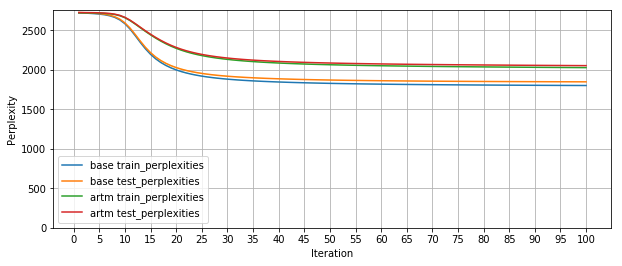

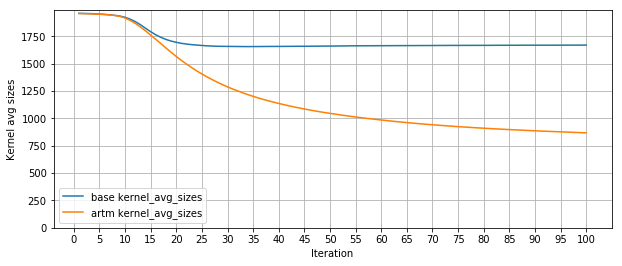

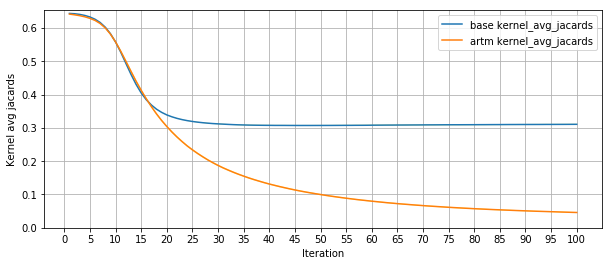

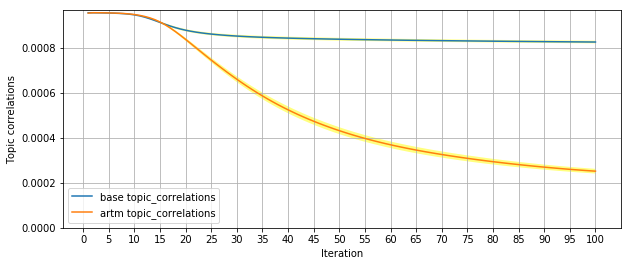

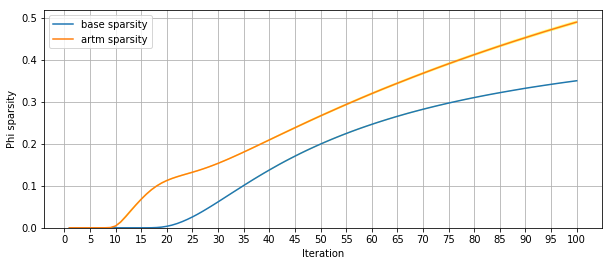

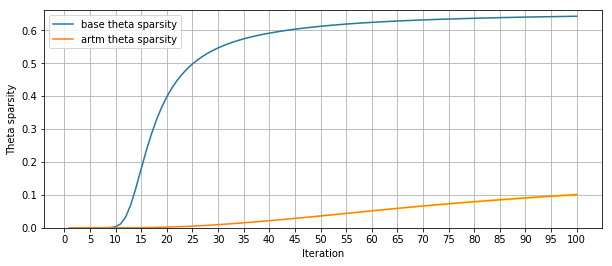

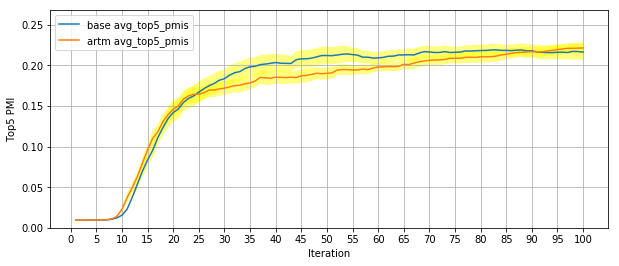

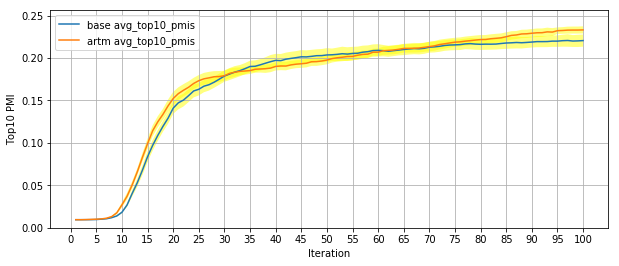

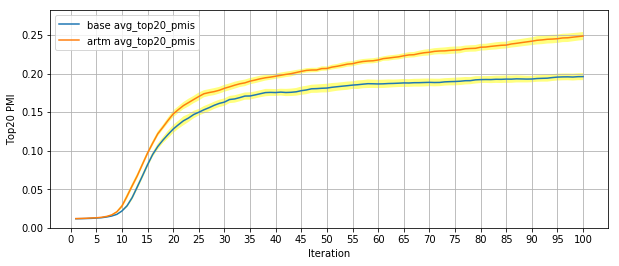

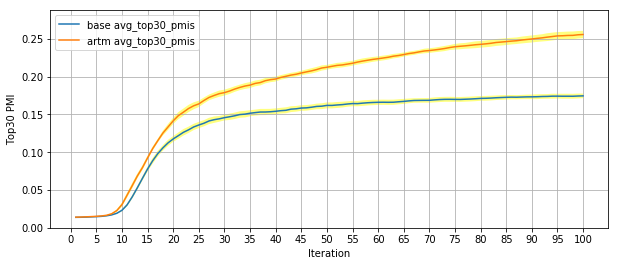

In [4]:
phi_experiment_res('./thetaless_exp/NIPS_20t/NIPS_20t_base_0_0.pkl', './thetaless_exp/NIPS_20t/NIPS_20t_artm_0_0.pkl')

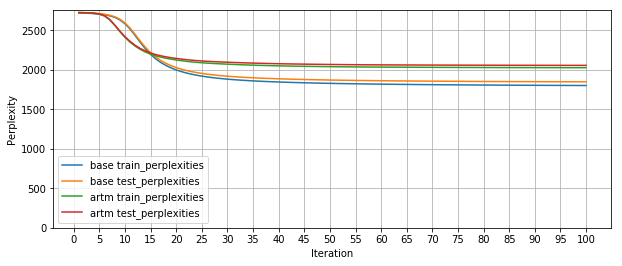

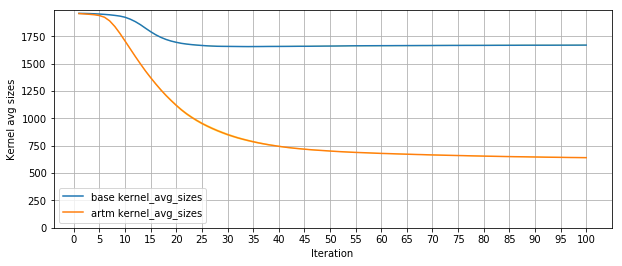

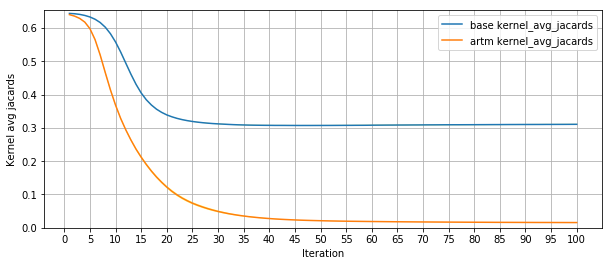

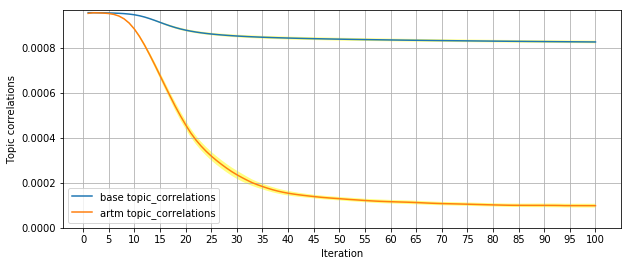

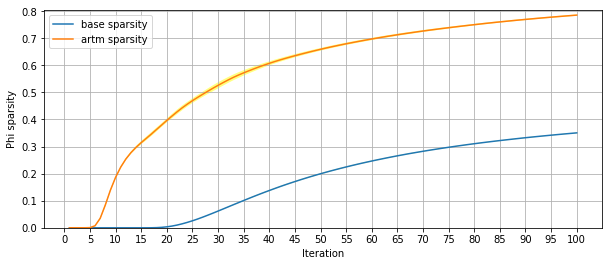

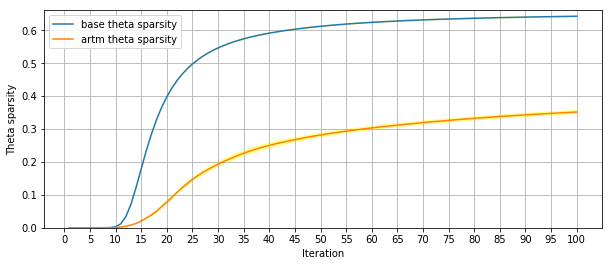

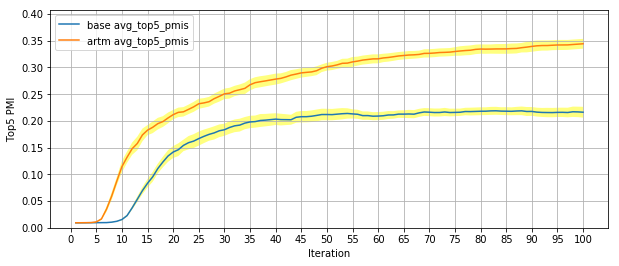

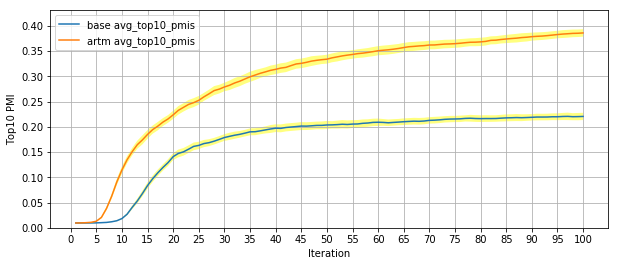

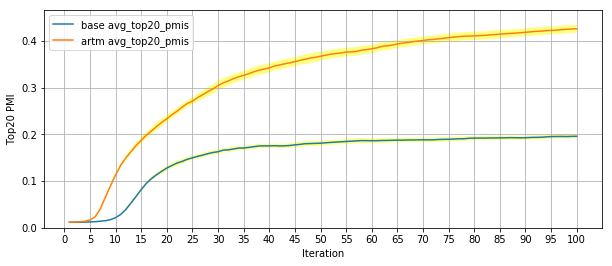

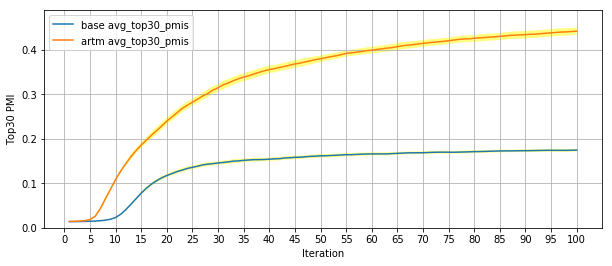

In [5]:
phi_experiment_res('./thetaless_exp/NIPS_20t/NIPS_20t_base_0_0.pkl', './thetaless_exp/NIPS_20t/NIPS_20t_artm_0_0_cheat.pkl')

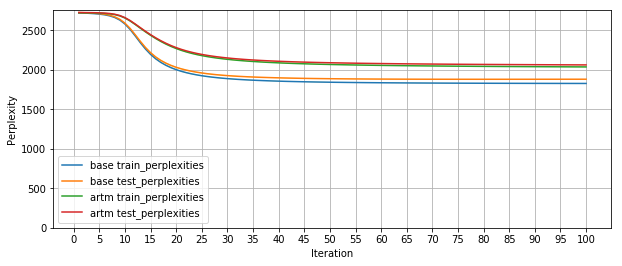

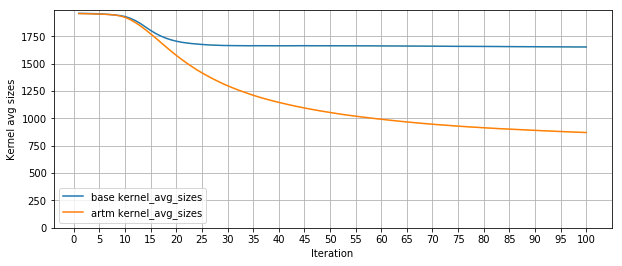

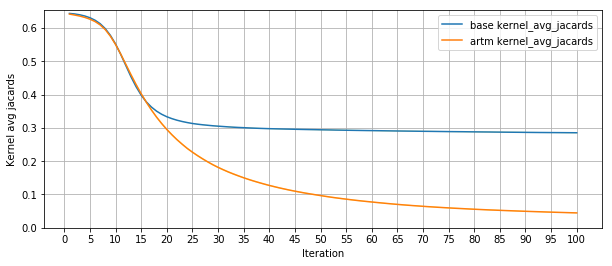

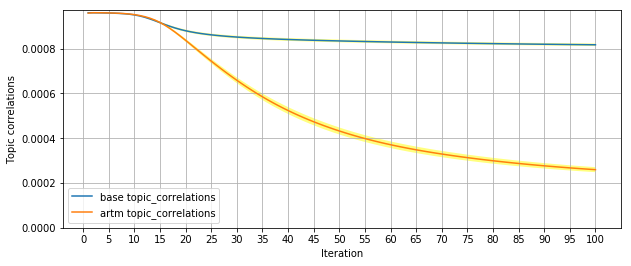

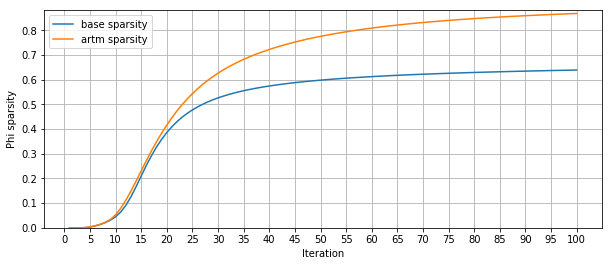

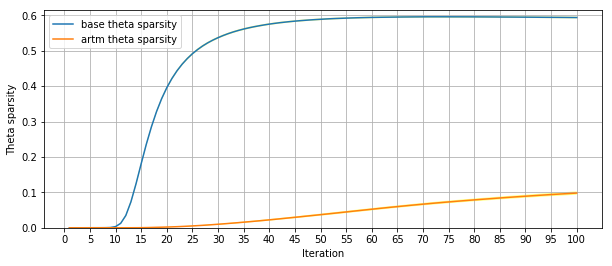

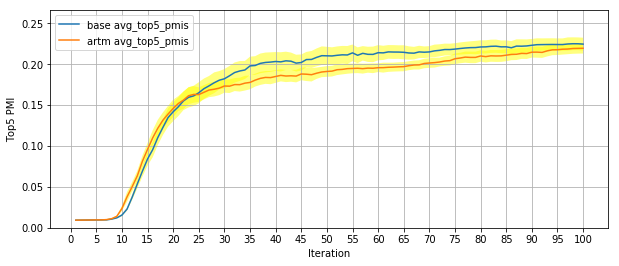

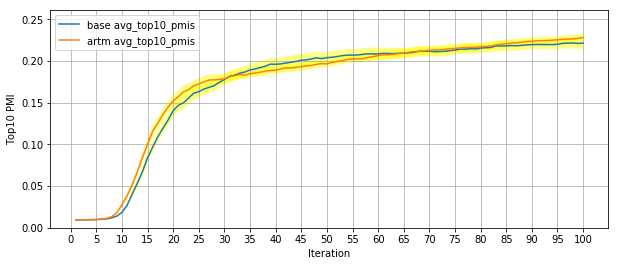

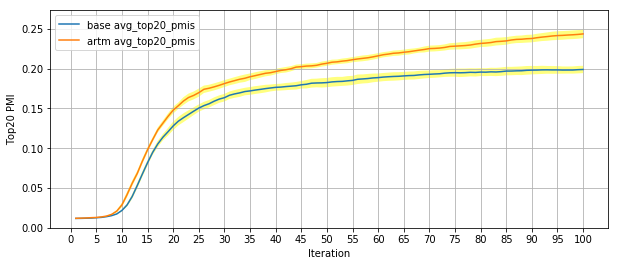

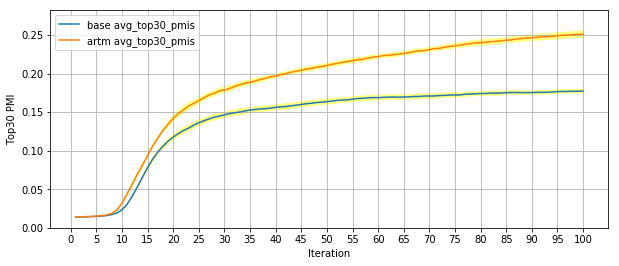

In [6]:
phi_experiment_res('./thetaless_exp/NIPS_20t/NIPS_20t_base_-0.1_0.pkl', './thetaless_exp/NIPS_20t/NIPS_20t_artm_-0.1_0.pkl')

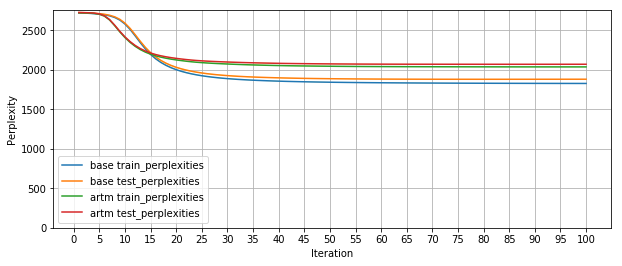

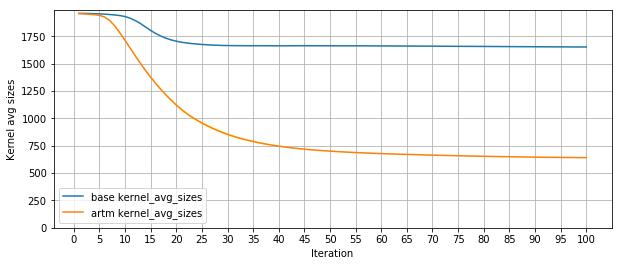

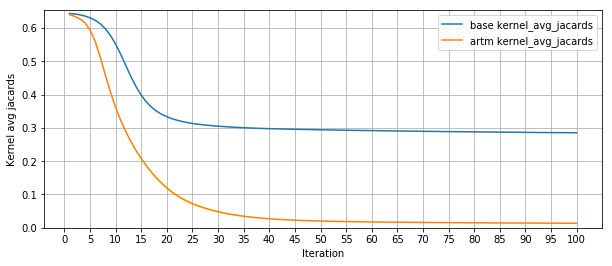

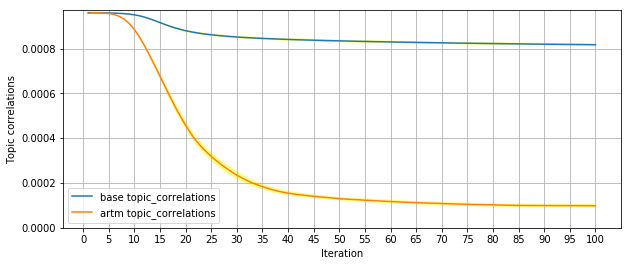

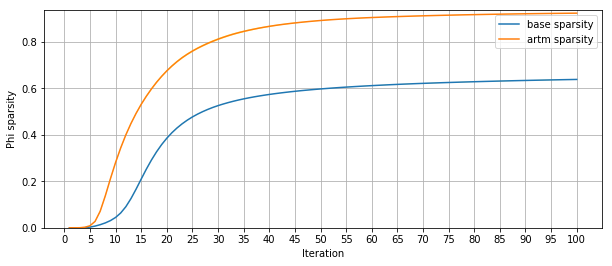

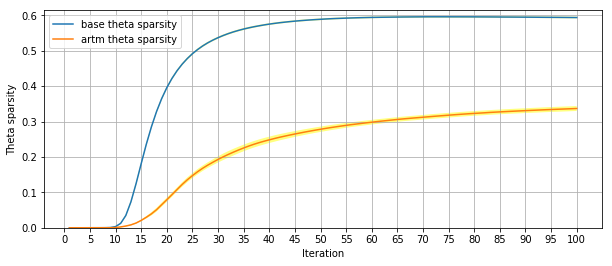

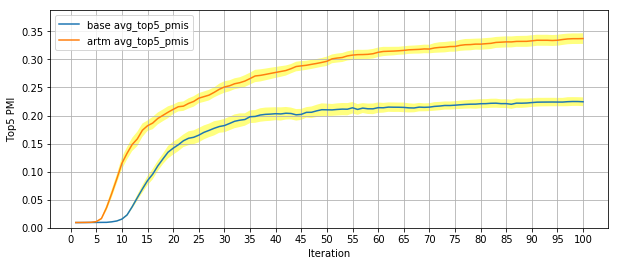

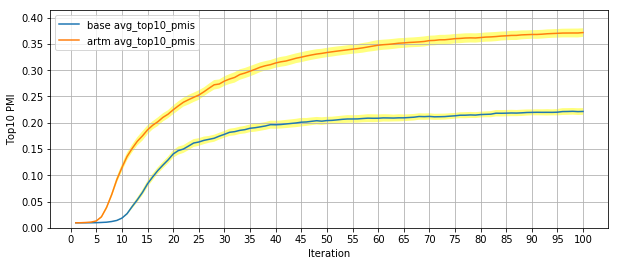

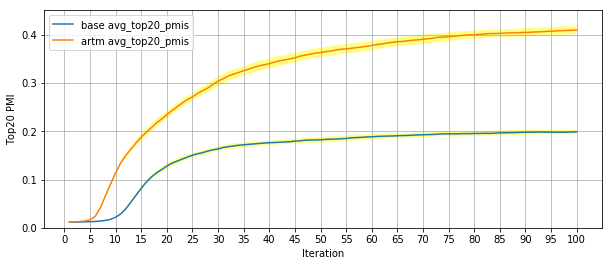

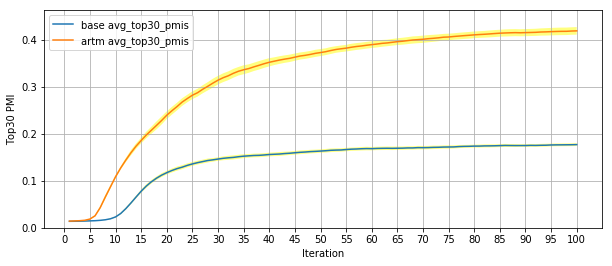

In [7]:
phi_experiment_res('./thetaless_exp/NIPS_20t/NIPS_20t_base_-0.1_0.pkl', './thetaless_exp/NIPS_20t/NIPS_20t_artm_-0.1_0_cheat.pkl')

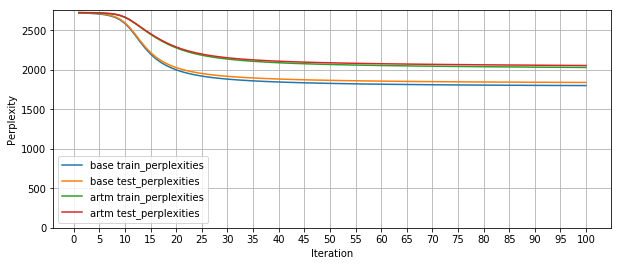

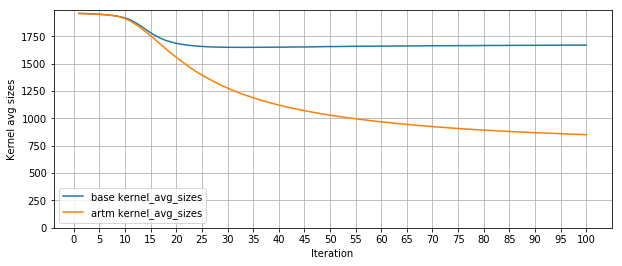

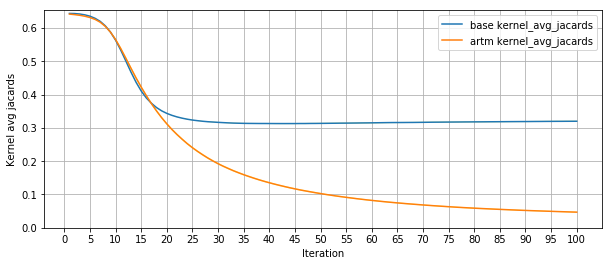

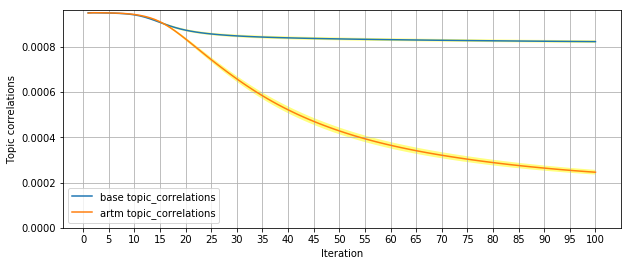

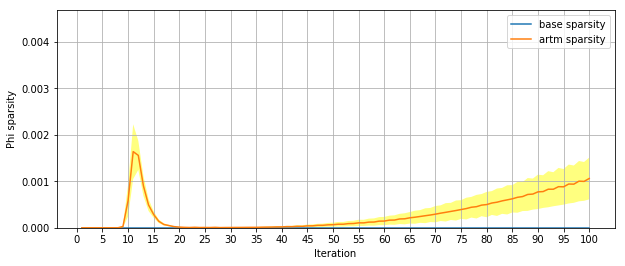

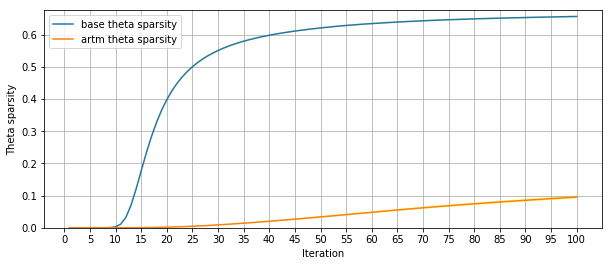

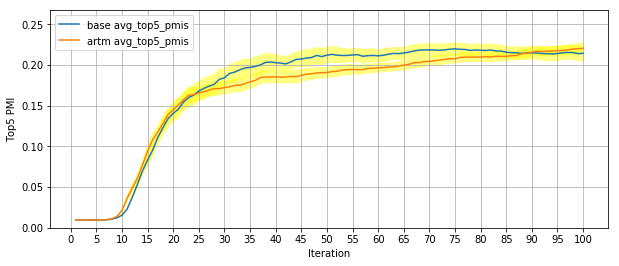

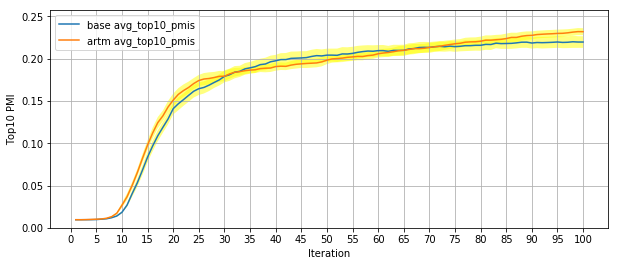

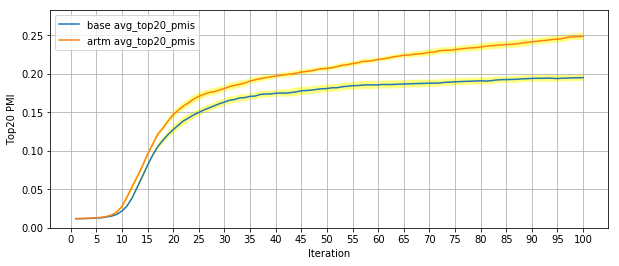

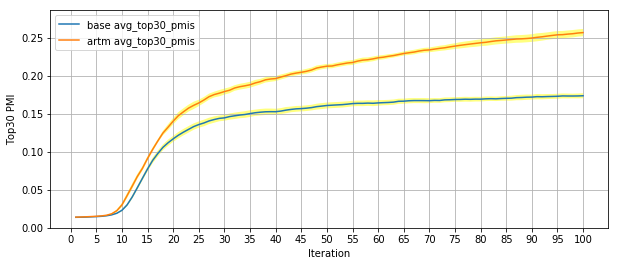

In [8]:
phi_experiment_res('./thetaless_exp/NIPS_20t/NIPS_20t_base_+0.1_0.pkl', './thetaless_exp/NIPS_20t/NIPS_20t_artm_+0.1_0.pkl')

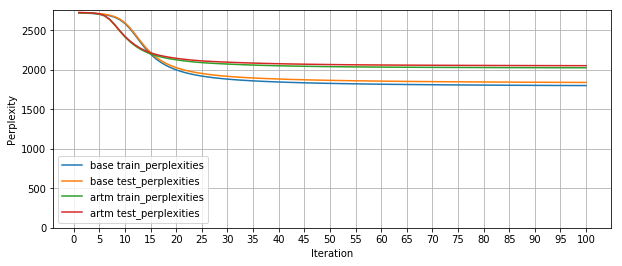

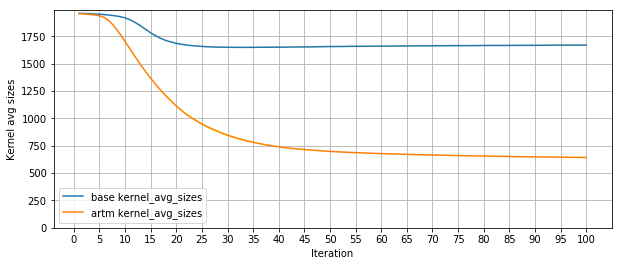

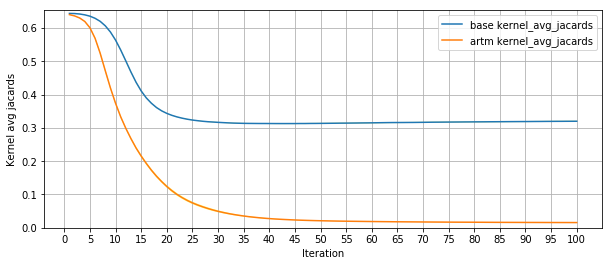

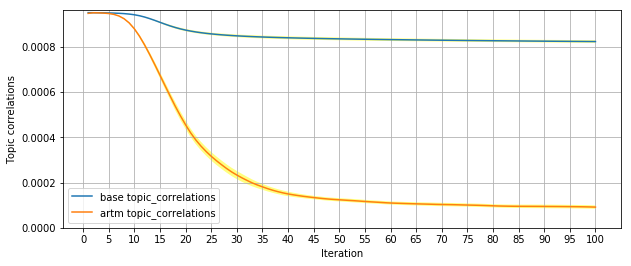

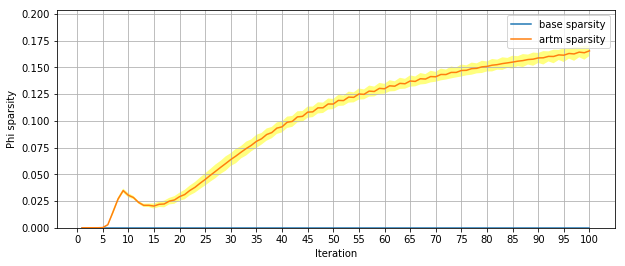

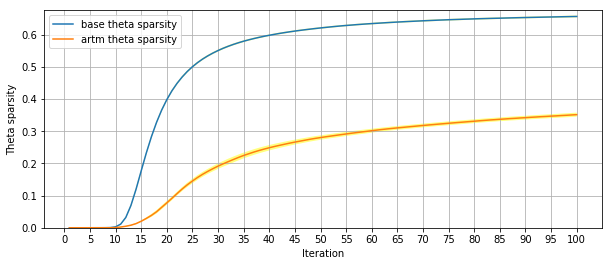

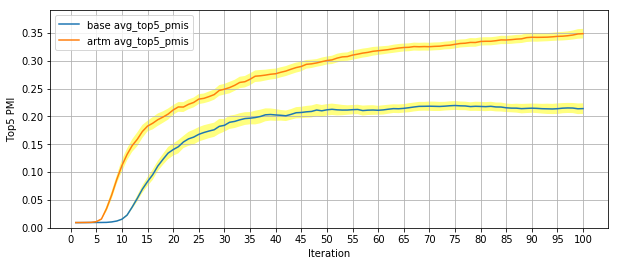

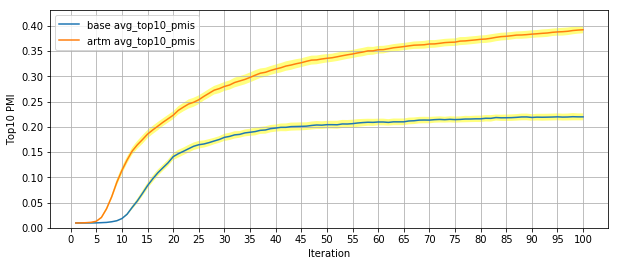

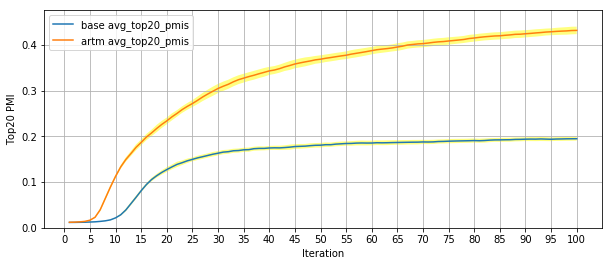

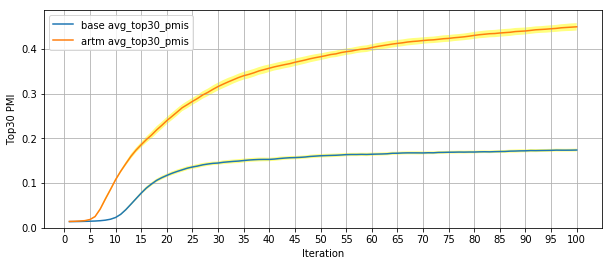

In [9]:
phi_experiment_res('./thetaless_exp/NIPS_20t/NIPS_20t_base_+0.1_0.pkl', './thetaless_exp/NIPS_20t/NIPS_20t_artm_+0.1_0_cheat.pkl')

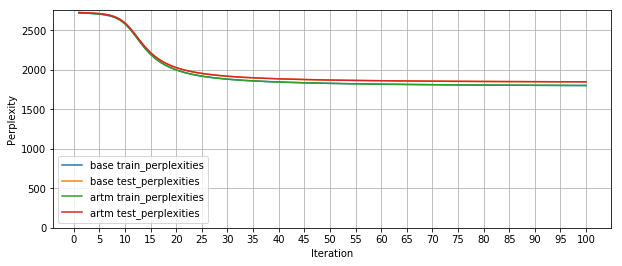

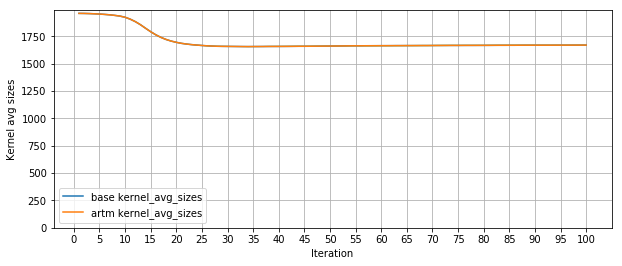

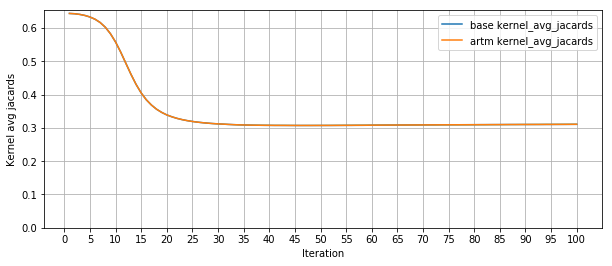

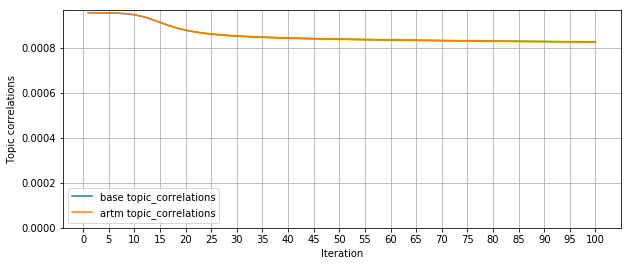

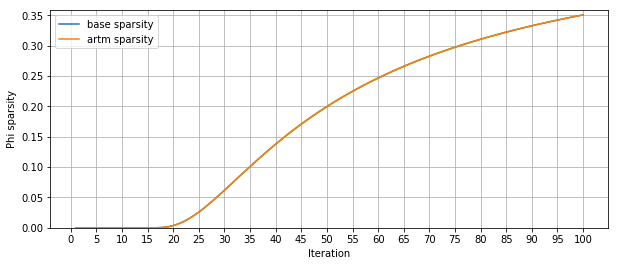

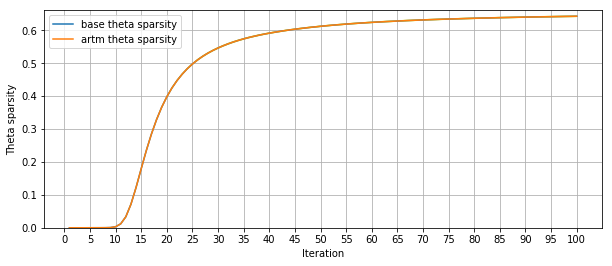

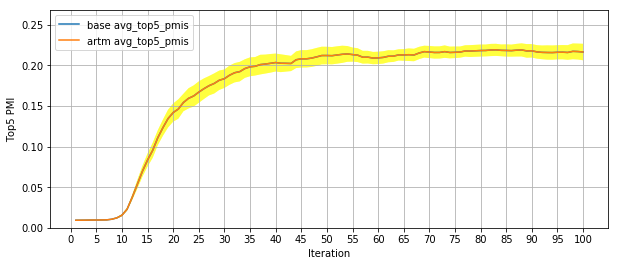

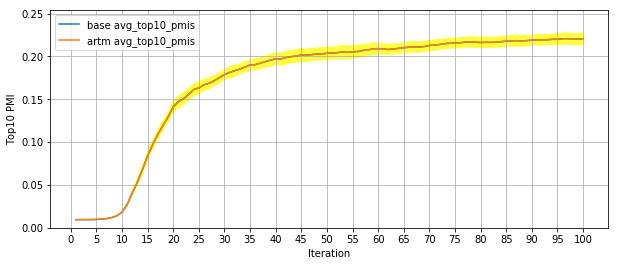

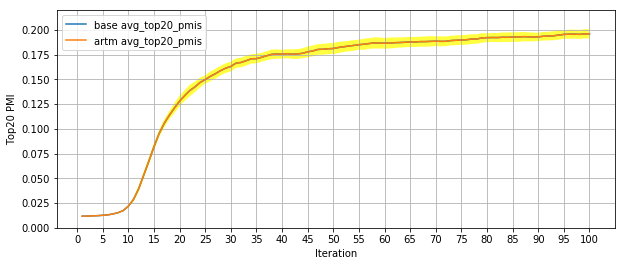

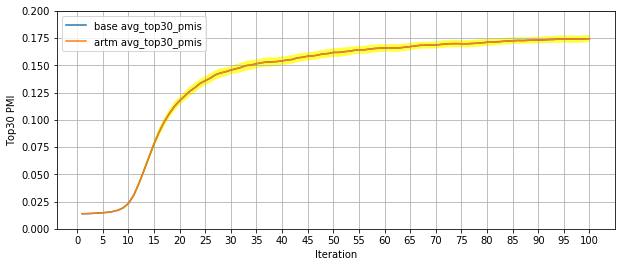

In [10]:
phi_experiment_res('./thetaless_exp/NIPS_20t/NIPS_20t_base_0_-0.1.pkl', './thetaless_exp/NIPS_20t/NIPS_20t_artm_0_-0.1.pkl')

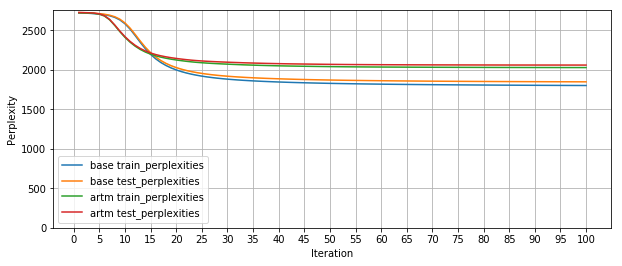

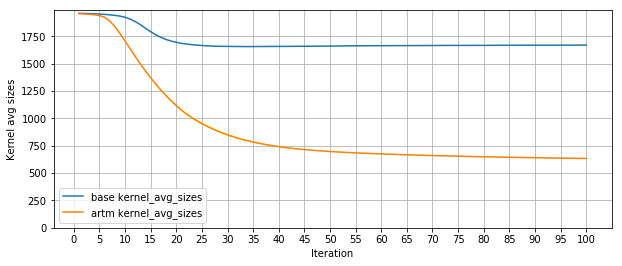

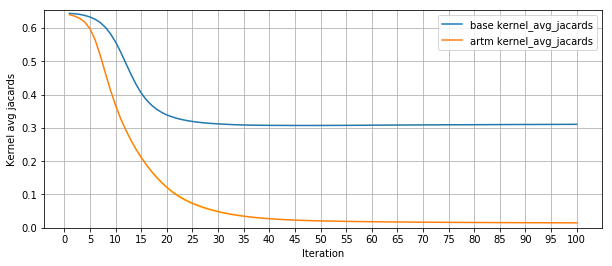

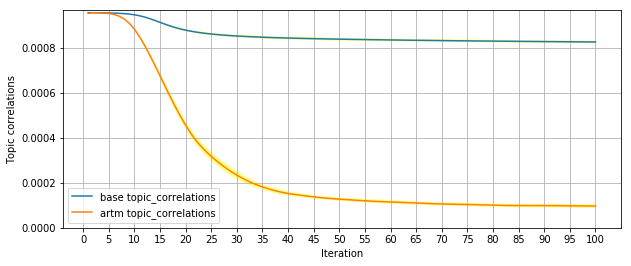

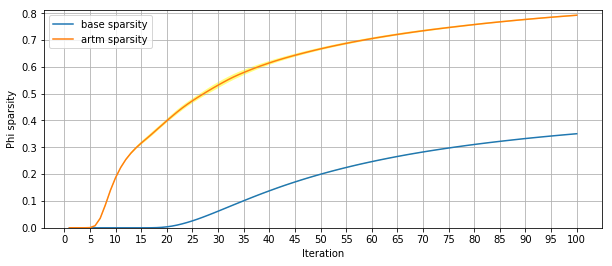

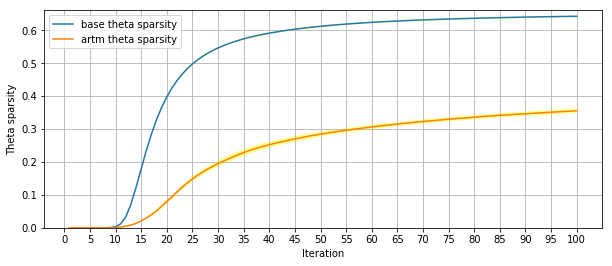

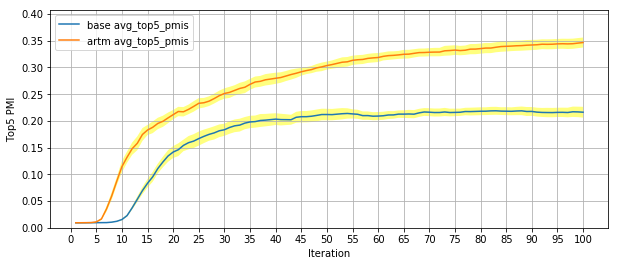

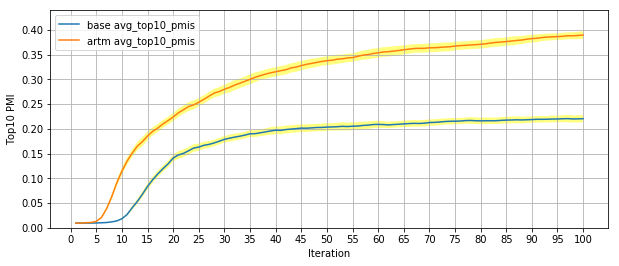

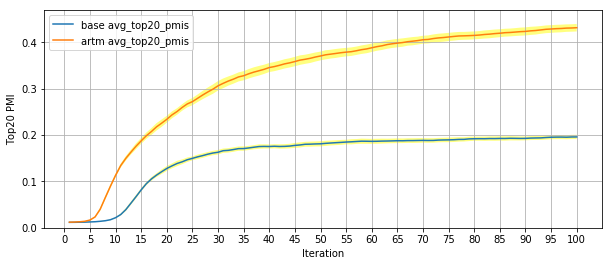

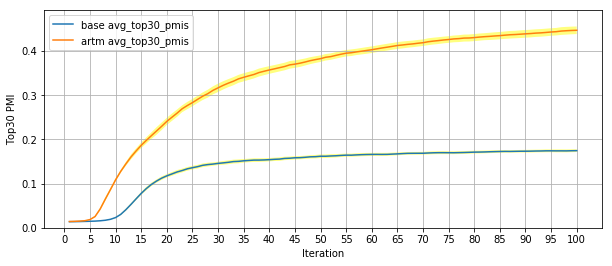

In [11]:
phi_experiment_res('./thetaless_exp/NIPS_20t/NIPS_20t_base_0_-0.1.pkl', './thetaless_exp/NIPS_20t/NIPS_20t_artm_0_-0.1_cheat.pkl')

# $T = 50$

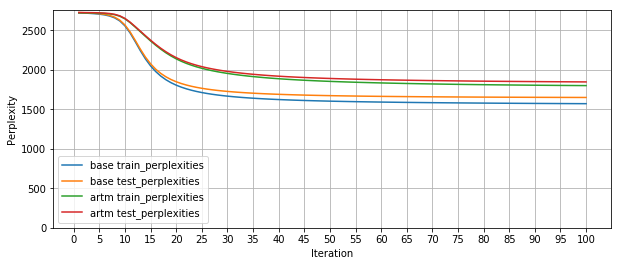

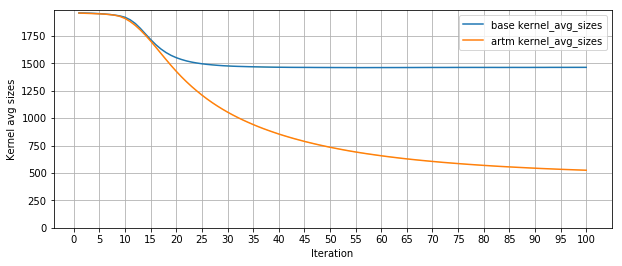

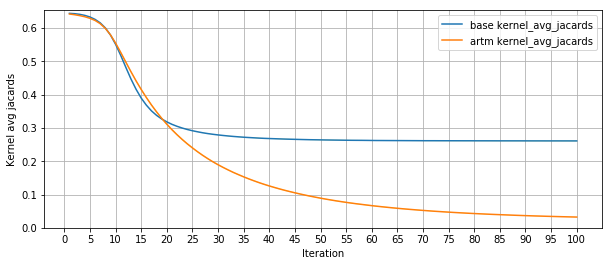

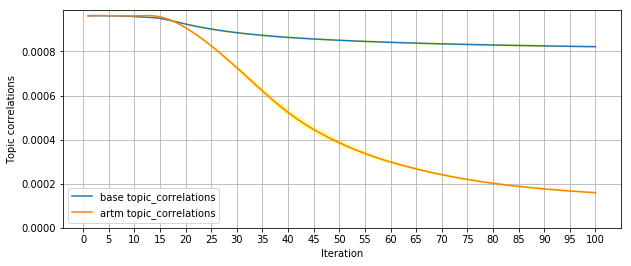

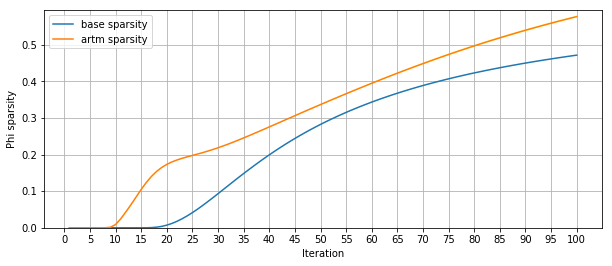

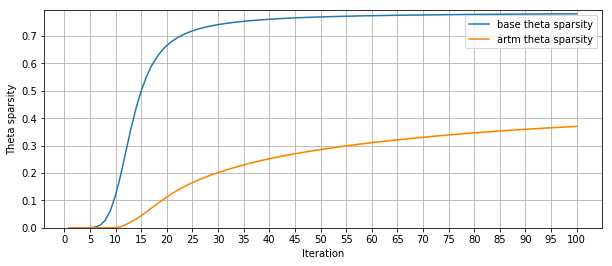

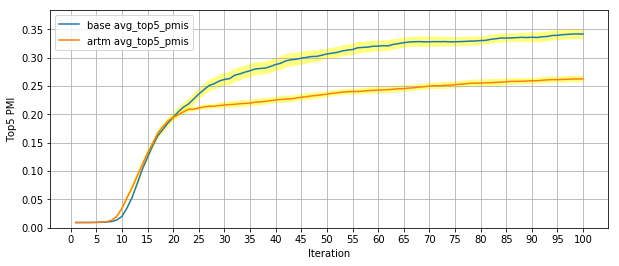

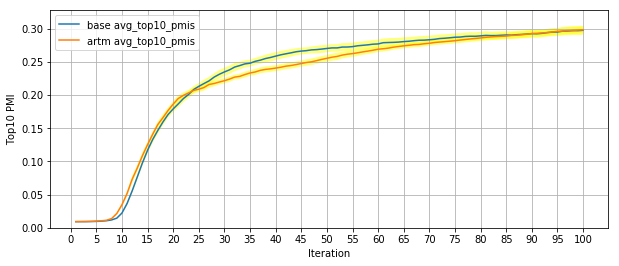

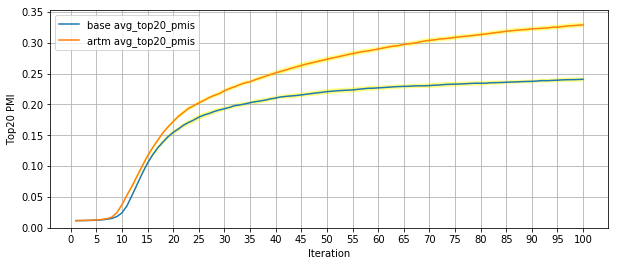

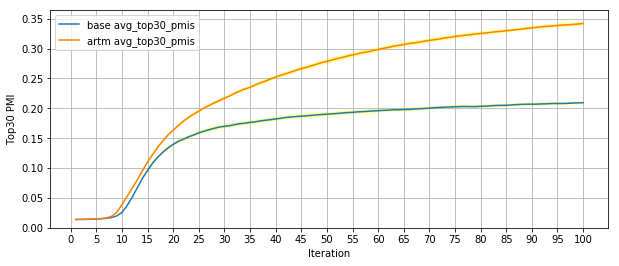

In [12]:
phi_experiment_res('./thetaless_exp/NIPS_50t/NIPS_50t_base_0_0.pkl', './thetaless_exp/NIPS_50t/NIPS_50t_artm_0_0.pkl')

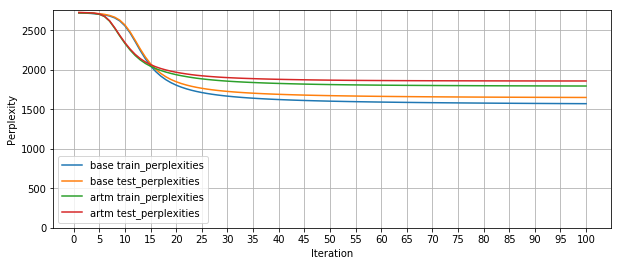

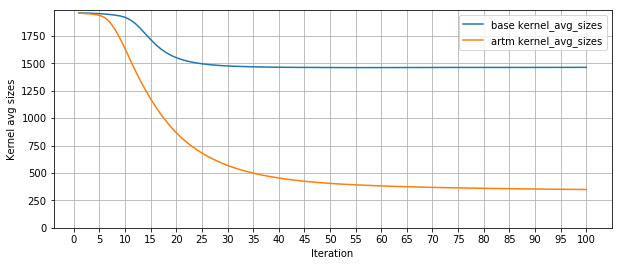

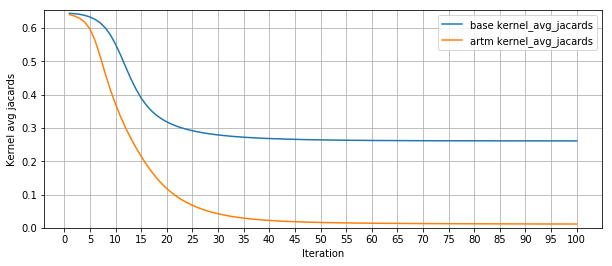

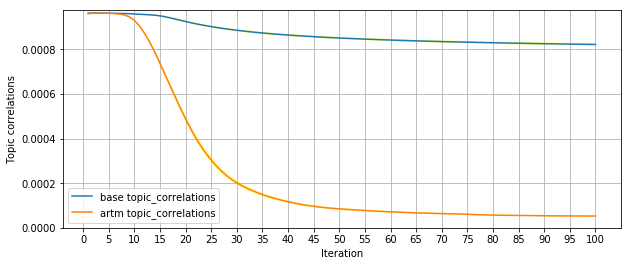

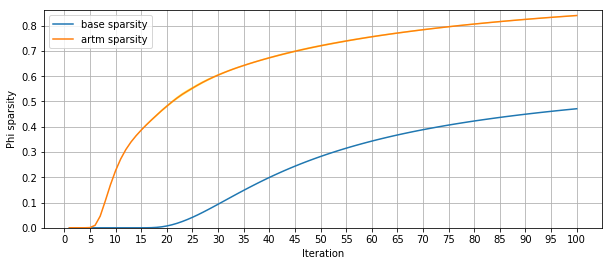

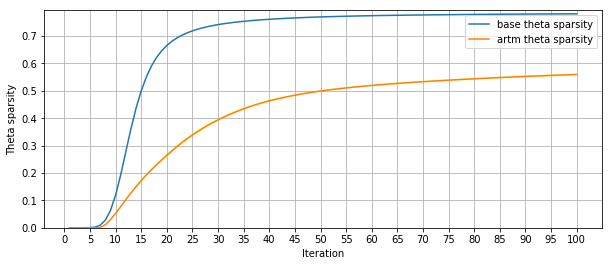

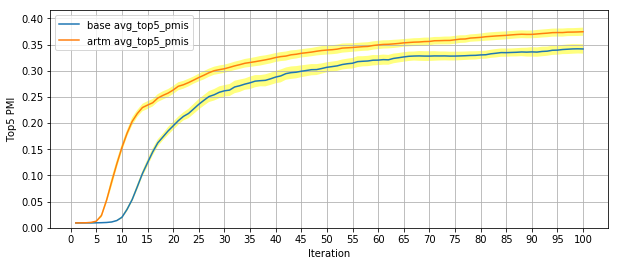

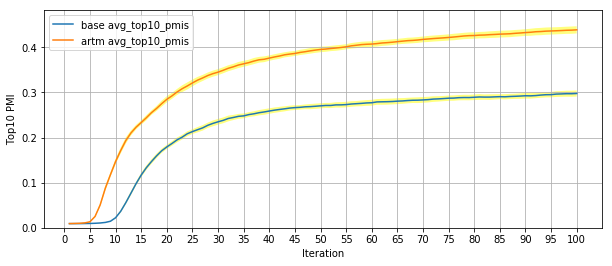

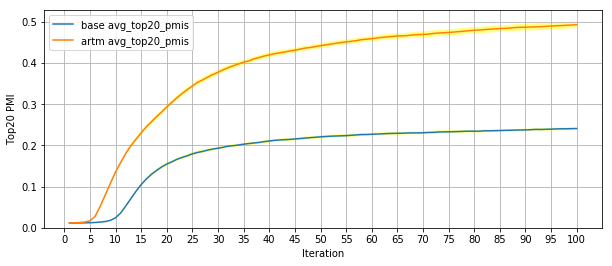

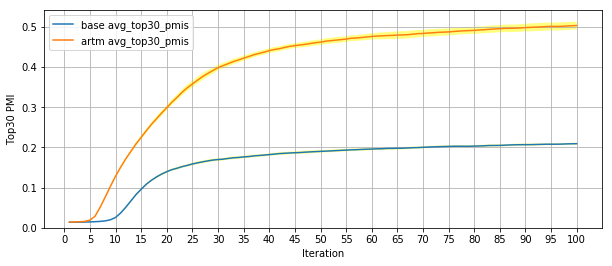

In [13]:
phi_experiment_res('./thetaless_exp/NIPS_50t/NIPS_50t_base_0_0.pkl', './thetaless_exp/NIPS_50t/NIPS_50t_artm_0_0_cheat.pkl')

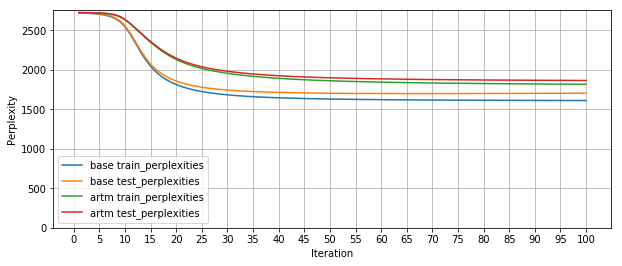

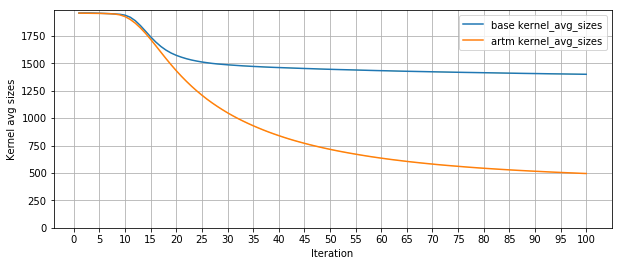

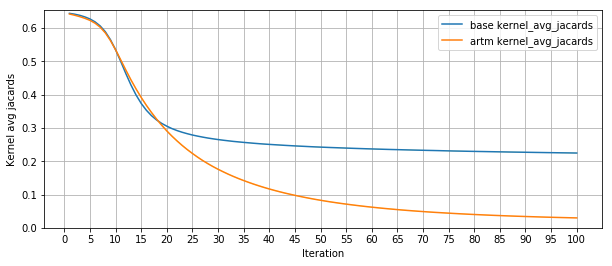

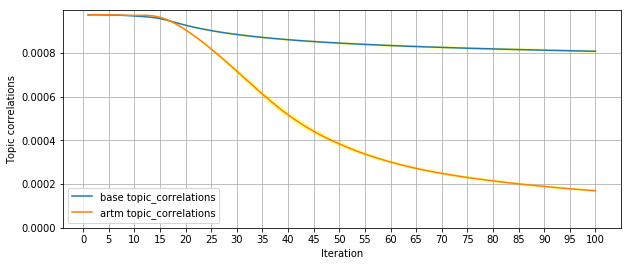

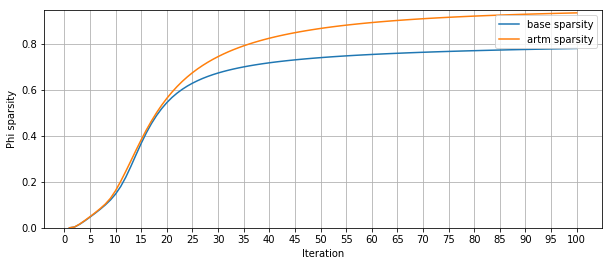

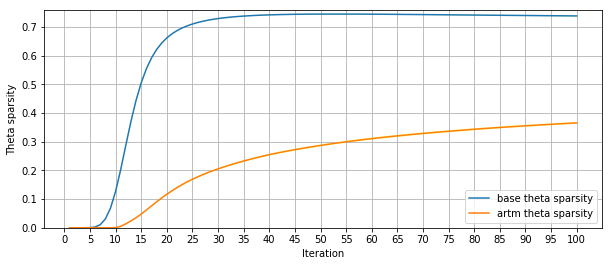

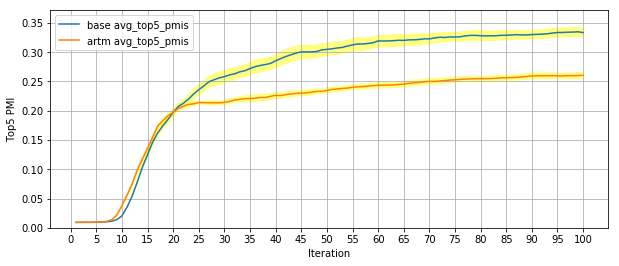

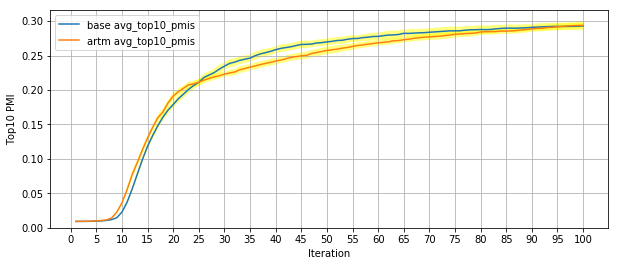

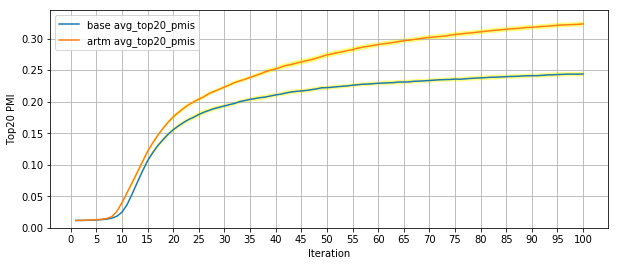

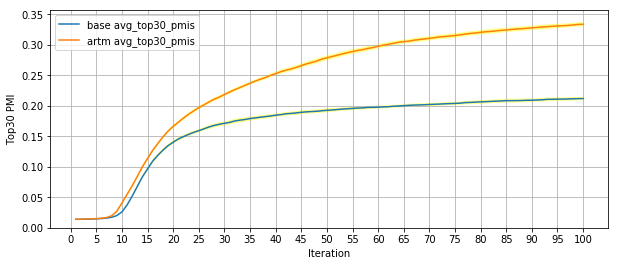

In [15]:
phi_experiment_res('./thetaless_exp/NIPS_50t/NIPS_50t_base_-0.1_0.pkl', './thetaless_exp/NIPS_50t/NIPS_50t_artm_-0.1_0.pkl')

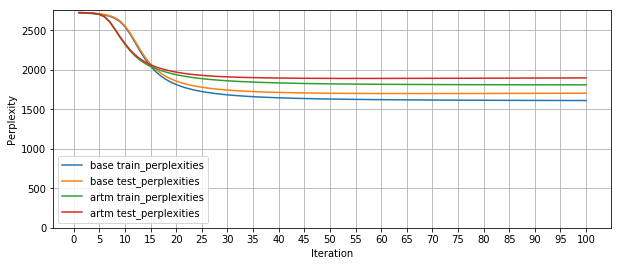

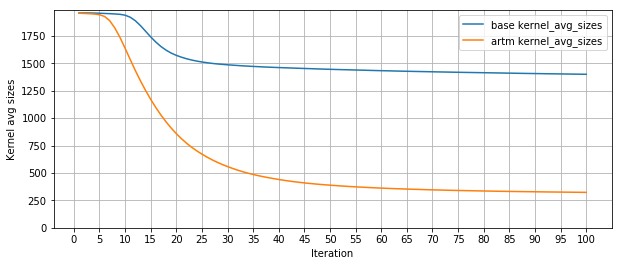

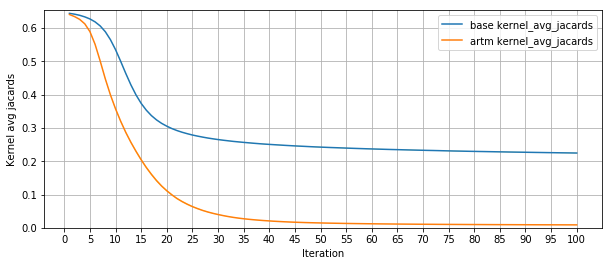

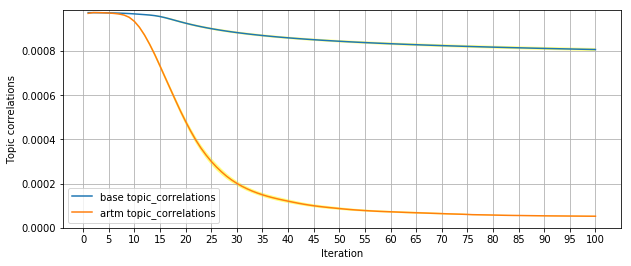

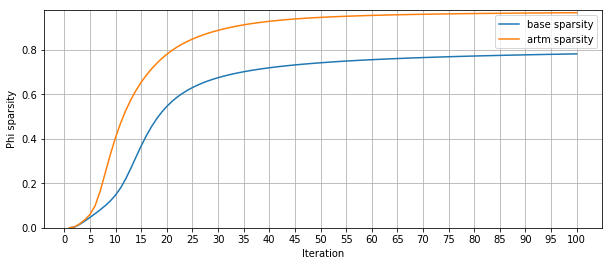

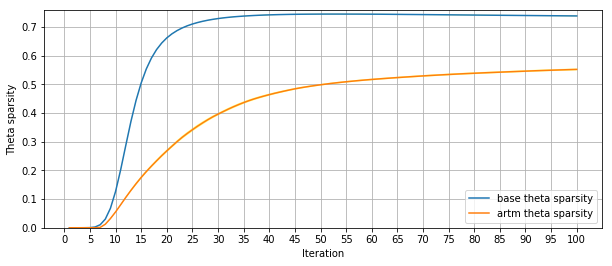

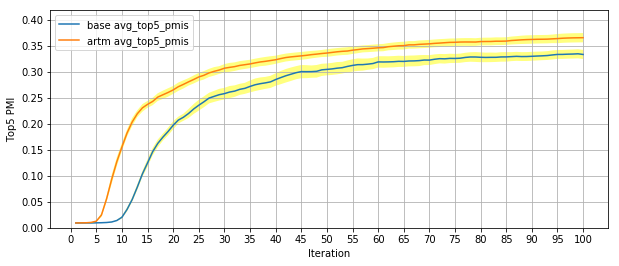

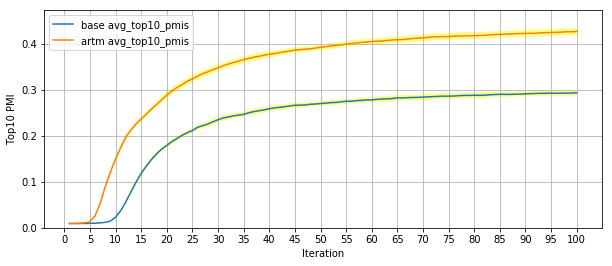

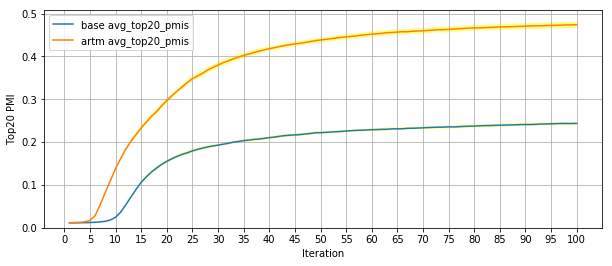

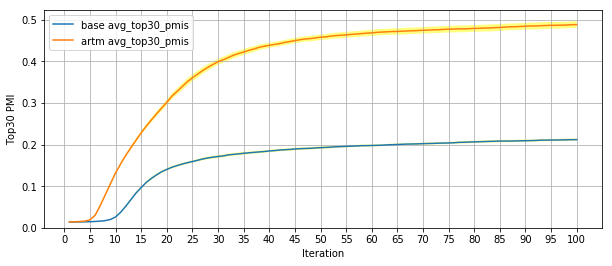

In [16]:
phi_experiment_res('./thetaless_exp/NIPS_50t/NIPS_50t_base_-0.1_0.pkl', './thetaless_exp/NIPS_50t/NIPS_50t_artm_-0.1_0_cheat.pkl')

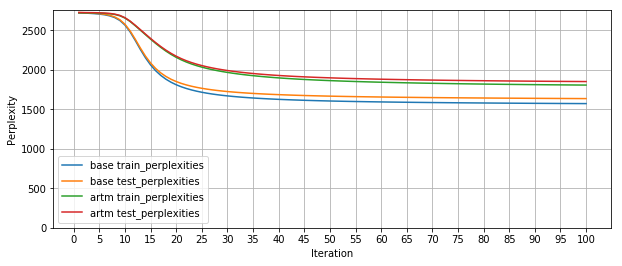

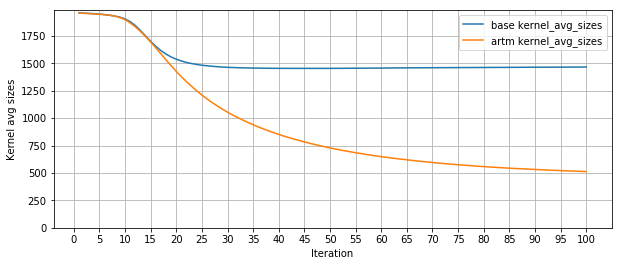

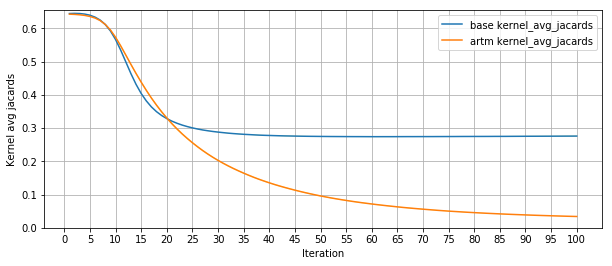

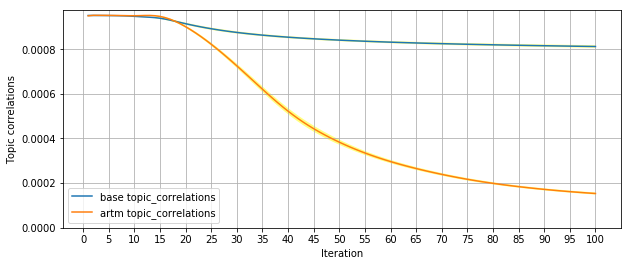

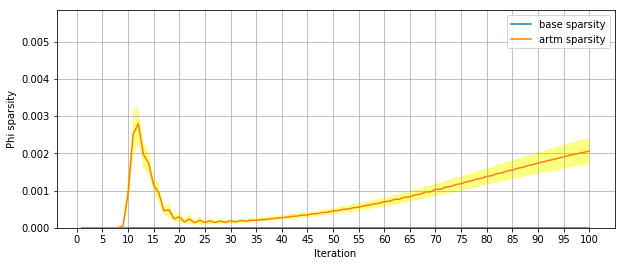

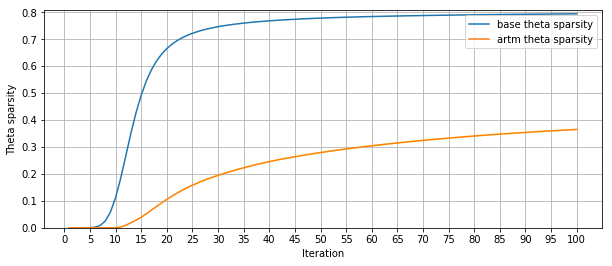

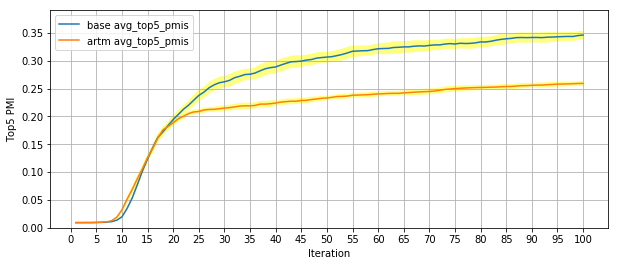

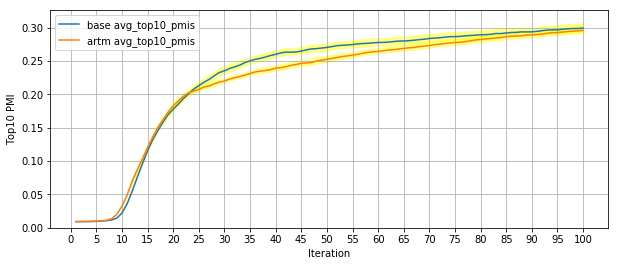

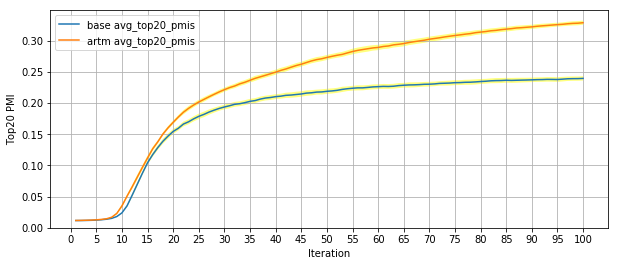

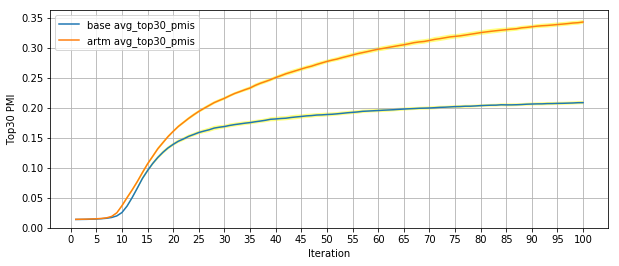

In [17]:
phi_experiment_res('./thetaless_exp/NIPS_50t/NIPS_50t_base_+0.1_0.pkl', './thetaless_exp/NIPS_50t/NIPS_50t_artm_+0.1_0.pkl')

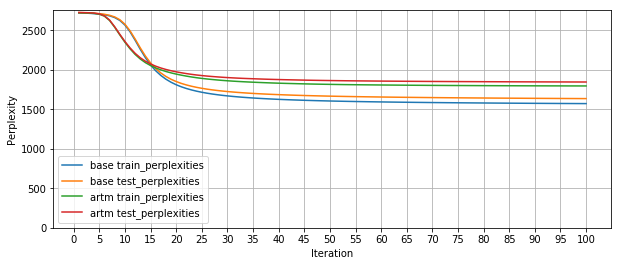

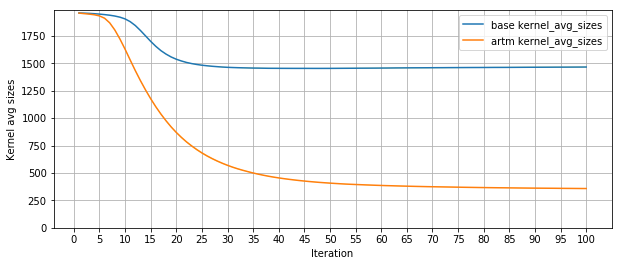

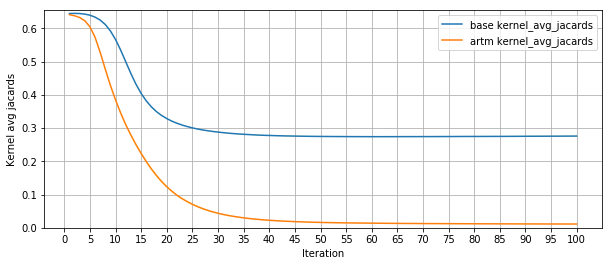

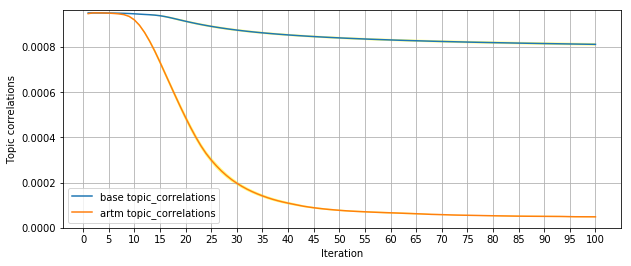

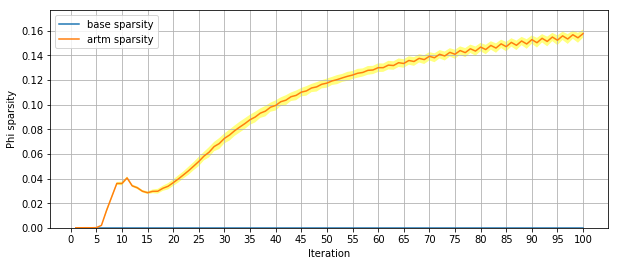

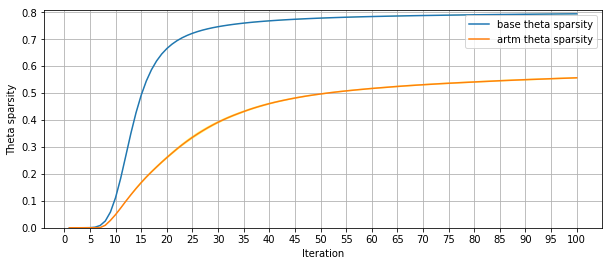

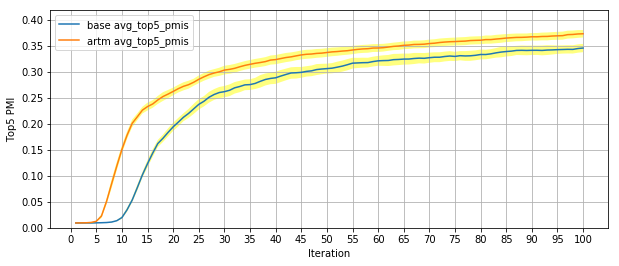

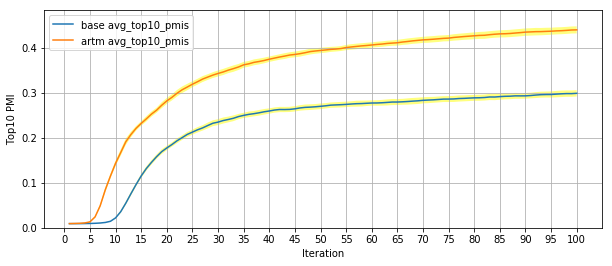

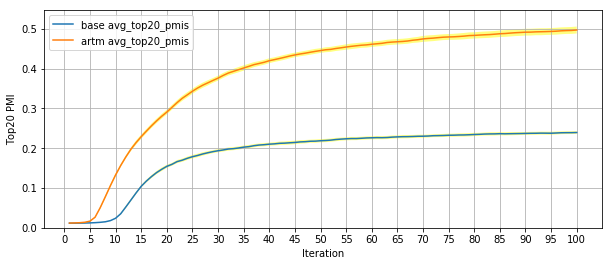

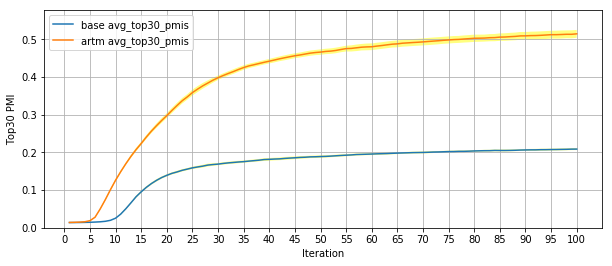

In [18]:
phi_experiment_res('./thetaless_exp/NIPS_50t/NIPS_50t_base_+0.1_0.pkl', './thetaless_exp/NIPS_50t/NIPS_50t_artm_+0.1_0_cheat.pkl')

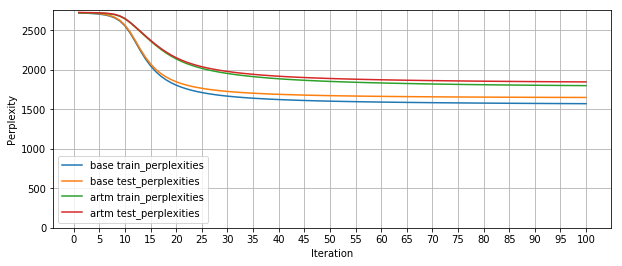

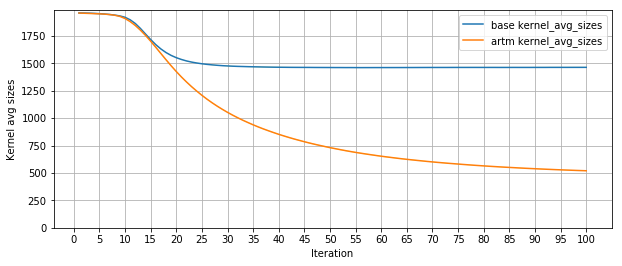

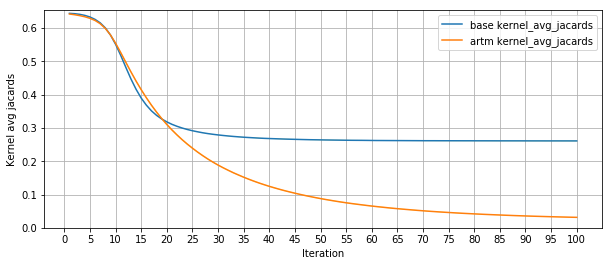

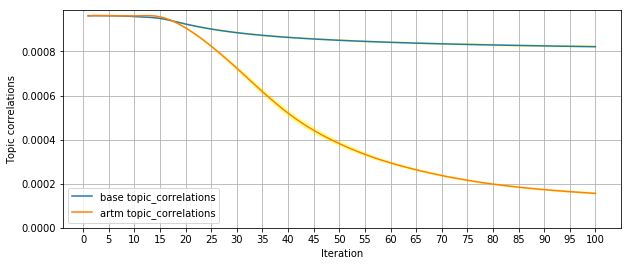

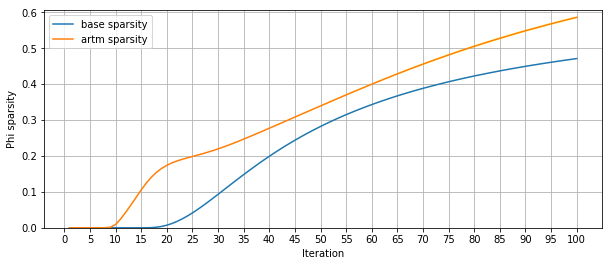

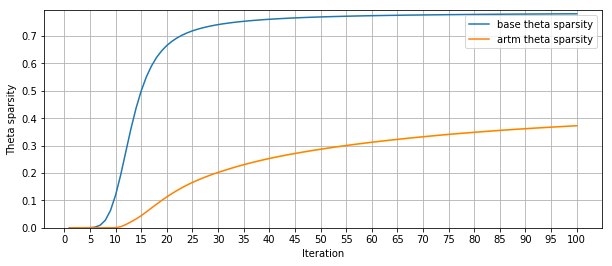

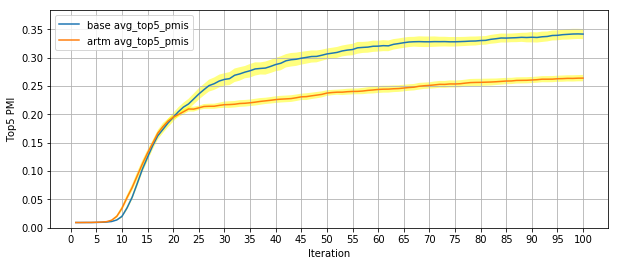

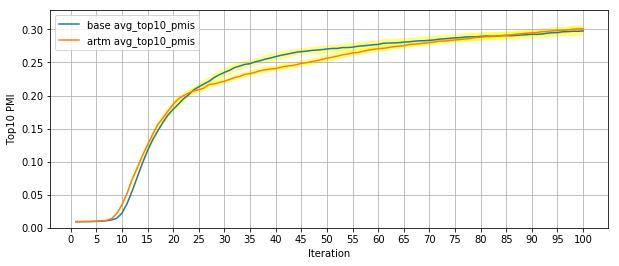

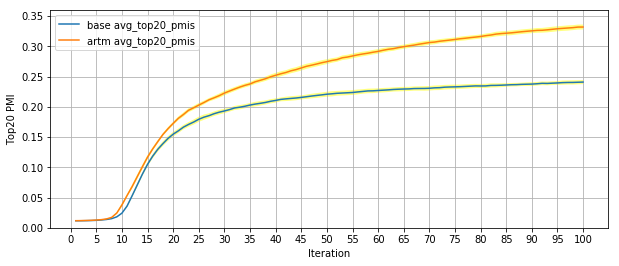

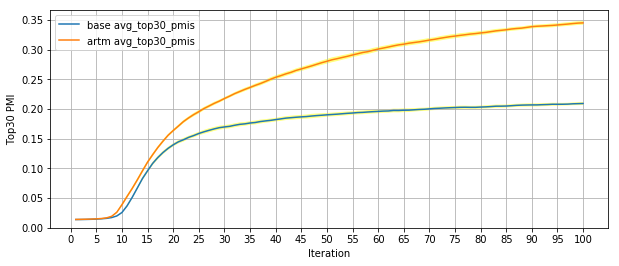

In [19]:
phi_experiment_res('./thetaless_exp/NIPS_50t/NIPS_50t_base_0_-0.1.pkl', './thetaless_exp/NIPS_50t/NIPS_50t_artm_0_-0.1.pkl')

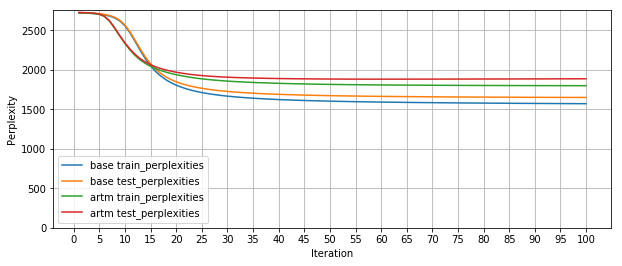

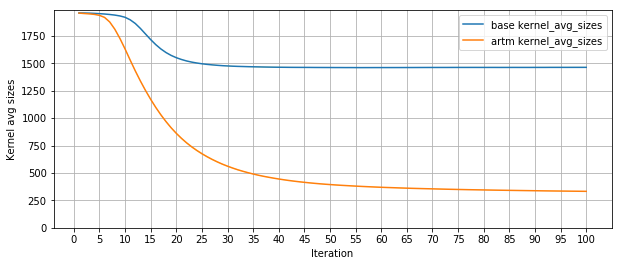

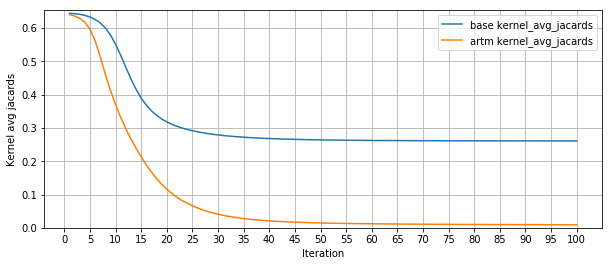

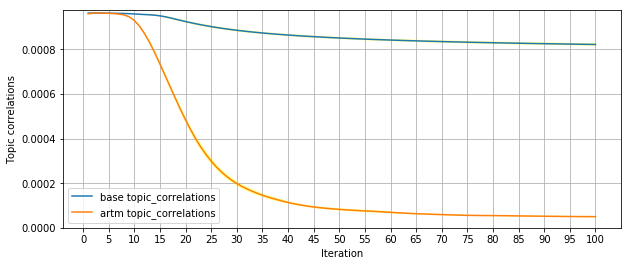

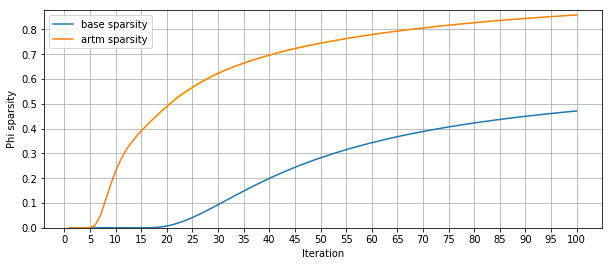

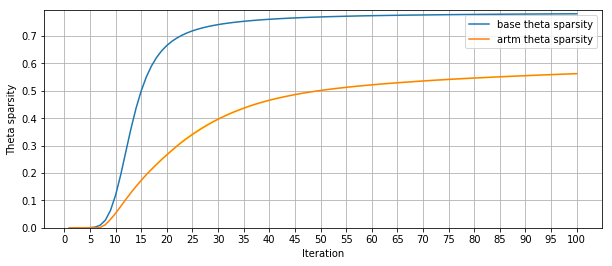

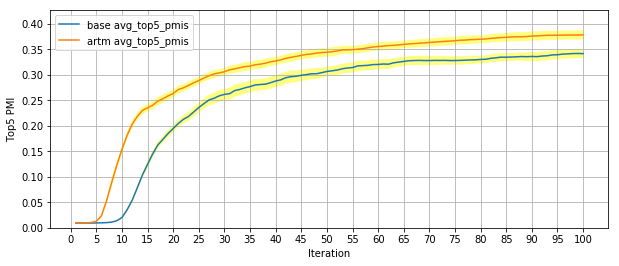

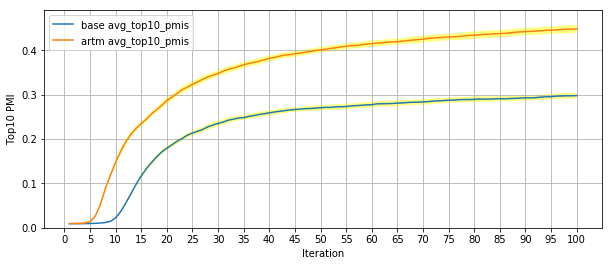

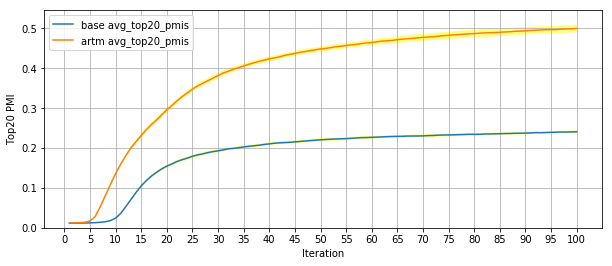

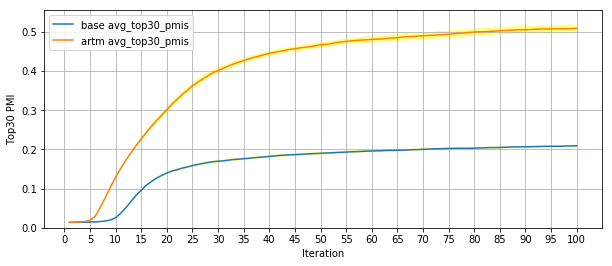

In [20]:
phi_experiment_res('./thetaless_exp/NIPS_50t/NIPS_50t_base_0_-0.1.pkl', './thetaless_exp/NIPS_50t/NIPS_50t_artm_0_-0.1_cheat.pkl')

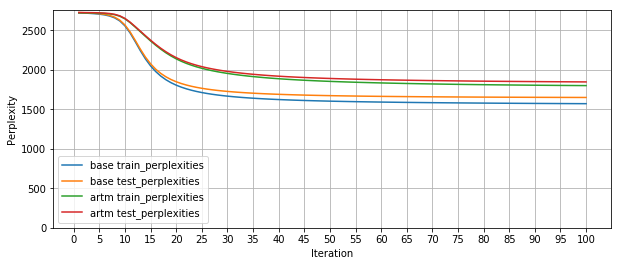

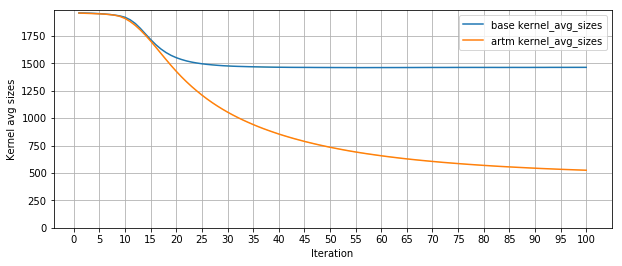

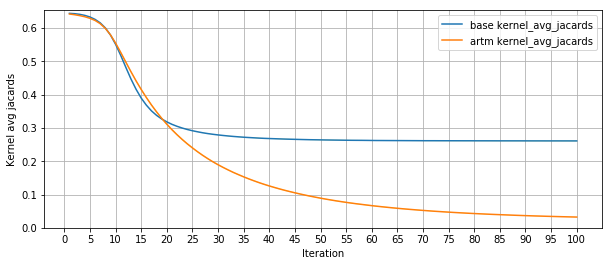

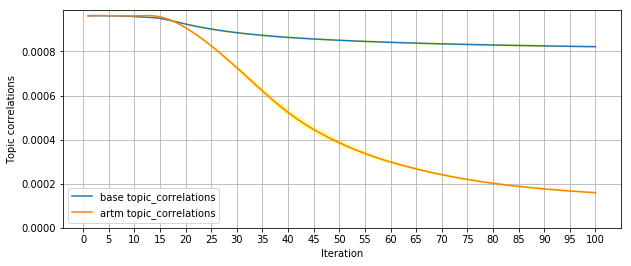

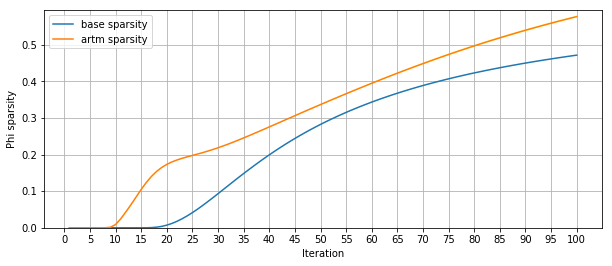

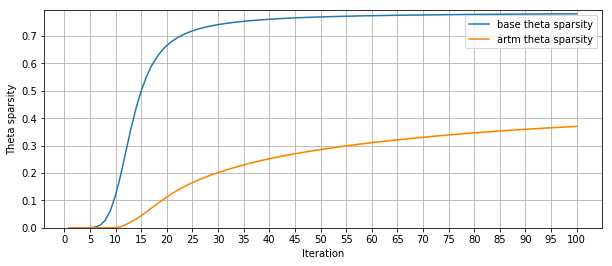

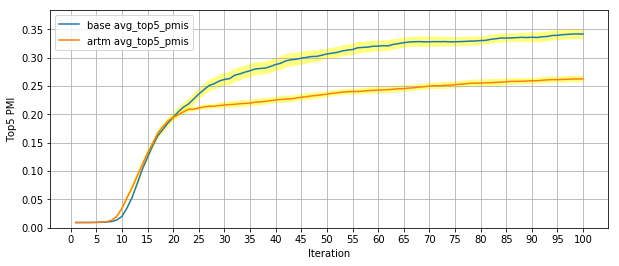

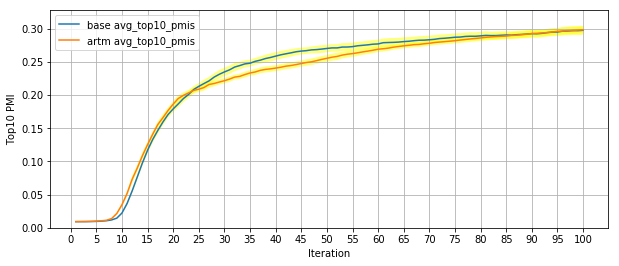

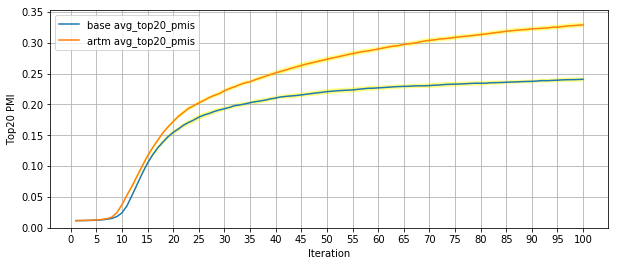

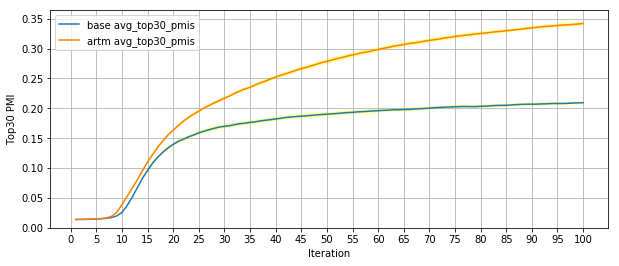

In [21]:
phi_experiment_res('./thetaless_exp/NIPS_50t/NIPS_50t_base_0_0.pkl', './thetaless_exp/NIPS_50t/NIPS_50t_artm_0_0.pkl')

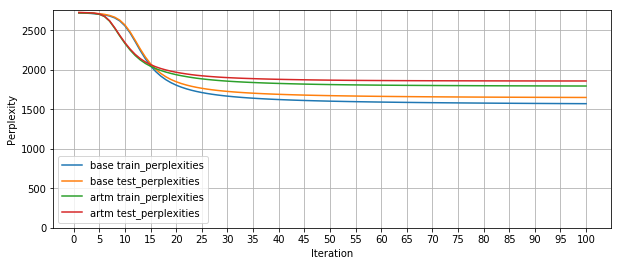

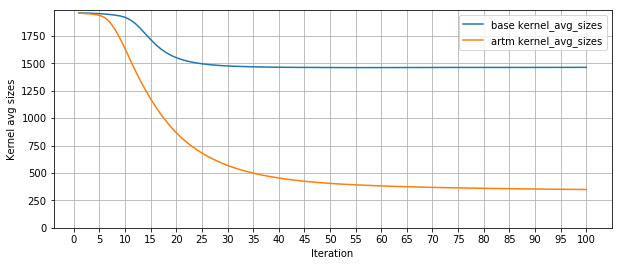

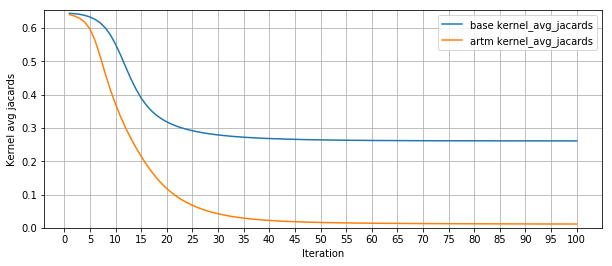

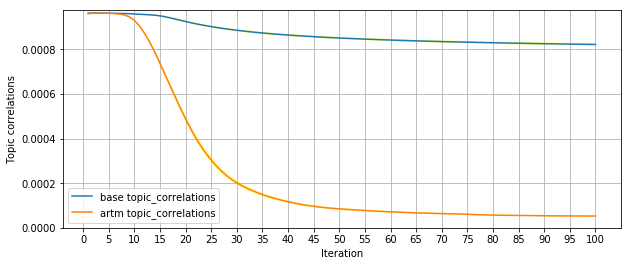

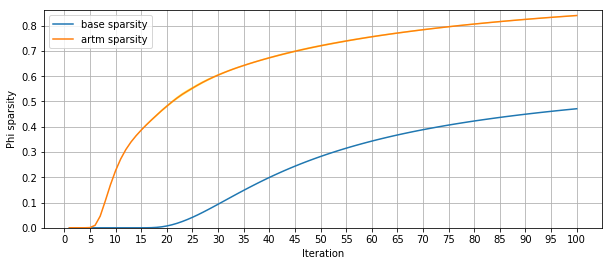

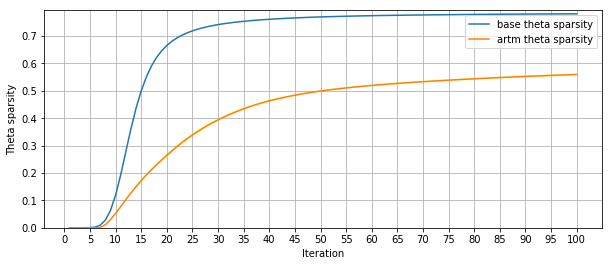

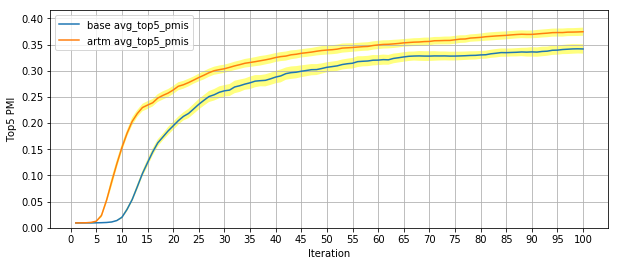

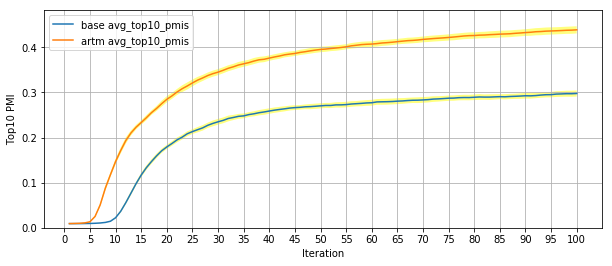

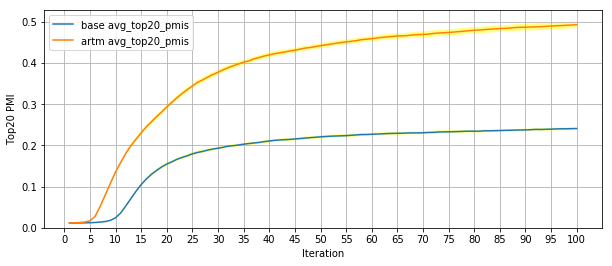

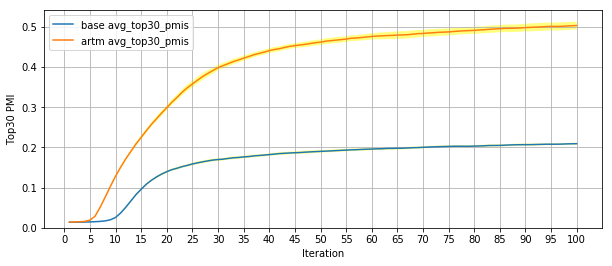

In [22]:
phi_experiment_res('./thetaless_exp/NIPS_50t/NIPS_50t_base_0_0.pkl', './thetaless_exp/NIPS_50t/NIPS_50t_artm_0_0_cheat.pkl')

In [71]:
base_list = [
    './thetaless_exp/{tag}/{tag}_base_0_0.pkl',
    './thetaless_exp/{tag}/{tag}_base_+0.1_0.pkl',
    './thetaless_exp/{tag}/{tag}_base_-0.1_0.pkl',
    './thetaless_exp/{tag}/{tag}_base_0_-0.1.pkl'
]
tartm_list = [
    './thetaless_exp/{tag}/{tag}_artm_0_0.pkl',
    './thetaless_exp/{tag}/{tag}_artm_+0.1_0.pkl',
    './thetaless_exp/{tag}/{tag}_artm_-0.1_0.pkl',
    './thetaless_exp/{tag}/{tag}_artm_0_-0.1.pkl'
]
tartm_mod_list = [
    './thetaless_exp/{tag}/{tag}_artm_0_0_cheat.pkl',
    './thetaless_exp/{tag}/{tag}_artm_+0.1_0_cheat.pkl',
    './thetaless_exp/{tag}/{tag}_artm_-0.1_0_cheat.pkl',
    './thetaless_exp/{tag}/{tag}_artm_0_-0.1_cheat.pkl'
]

In [88]:
def helper(target_value, pathes, agg_func, tag):
    res = []
    for path in pathes:
        with open(path.format(tag=tag), 'r') as f:
            values = pickle.load(f)[target_value]
            res.append(np.mean(values, axis=0))
    return agg_func(res)


def compare(target_value, agg_func, tag):
    plsa_res = helper(target_value, base_list, agg_func, tag)
    tartm_res = helper(target_value, tartm_list, agg_func, tag)
    tartm_mod_res = helper(target_value, tartm_mod_list, agg_func, tag)
    
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1,1,1)
    major_ticks = np.arange(0, 101, 5)
    ax.set_xticks(major_ticks)   
    #plt.ylim(0., np.max(values_list) * 1.01)
    
    plt.plot(plsa_res)
    plt.plot(tartm_res)
    plt.plot(tartm_mod_res)
    
    plt.xlabel('Iteration')
    plt.ylabel(target_value)
    plt.legend(['plsa', 'TARTM', 'mTARTM'])
    plt.grid()
    
    plt.savefig('{}_{}.eps'.format(tag, target_value), format="eps")
    plt.show()

In [89]:
font = {
    'family' : 'normal',
    'size'   : 14
}

plt.rc('font', **font)

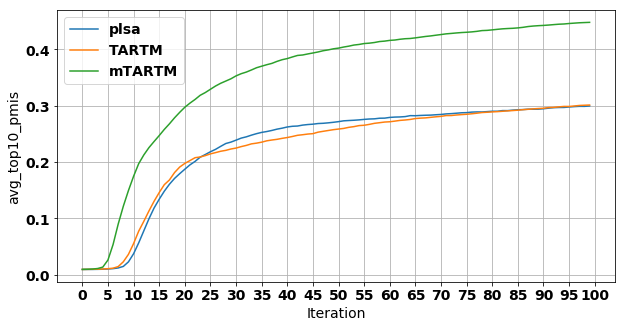

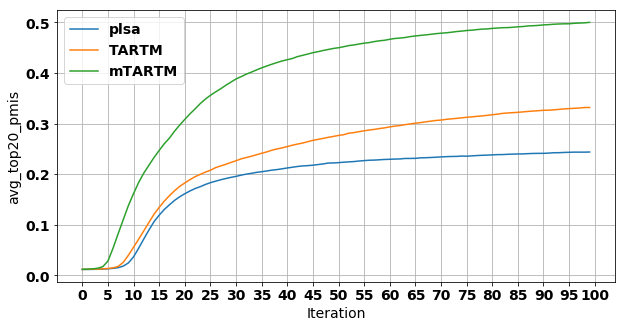

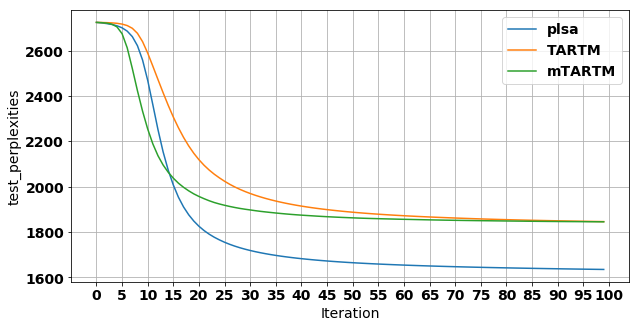

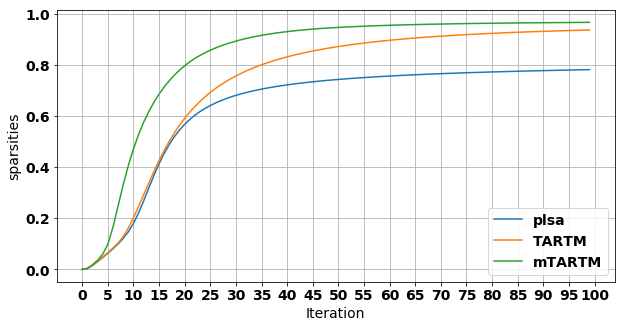

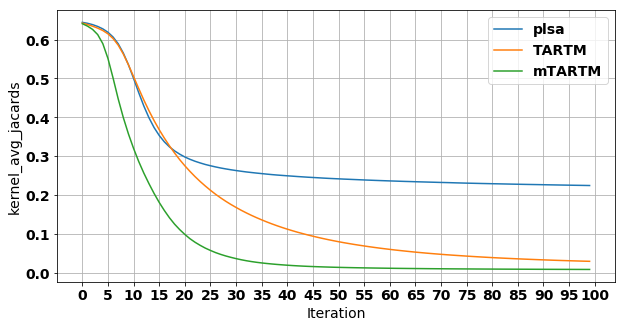

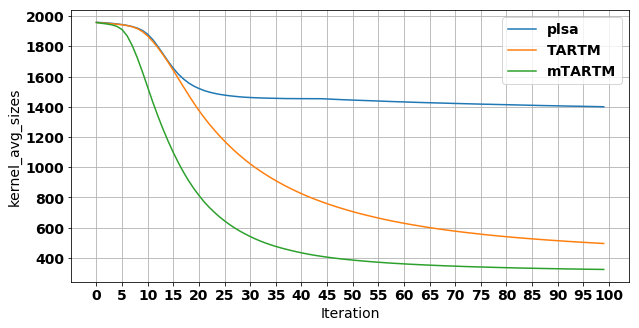

In [90]:
compare('avg_top10_pmis', lambda x: np.max(x, axis=0), 'NIPS_50t')
compare('avg_top20_pmis', lambda x: np.max(x, axis=0), 'NIPS_50t')
compare('test_perplexities', lambda x: np.min(x, axis=0), 'NIPS_50t')
compare('sparsities', lambda x: np.max(x, axis=0), 'NIPS_50t')
compare('kernel_avg_jacards', lambda x: np.min(x, axis=0), 'NIPS_50t')
compare('kernel_avg_sizes', lambda x: np.min(x, axis=0), 'NIPS_50t')

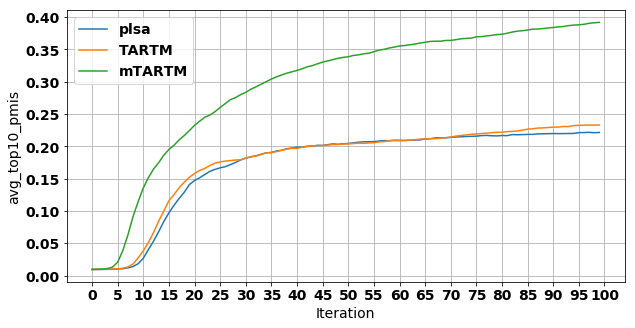

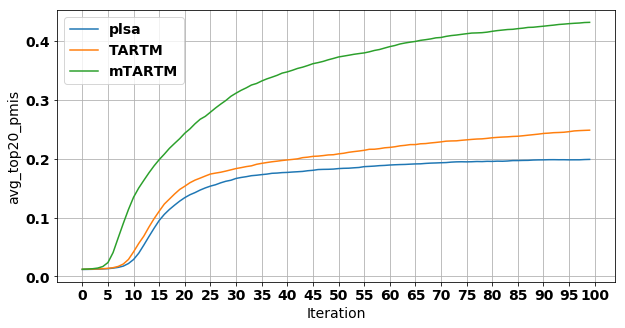

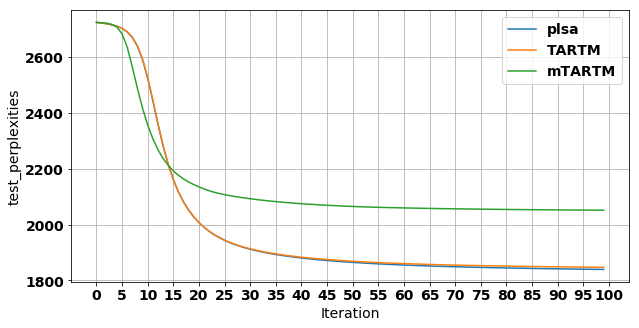

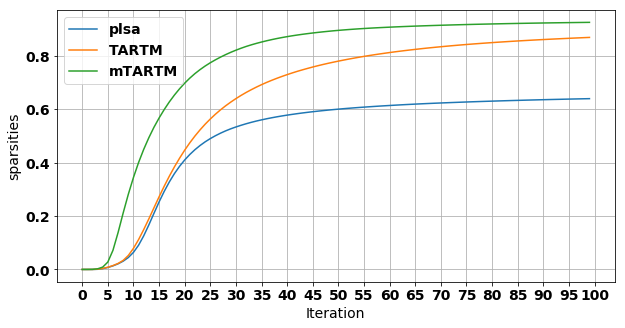

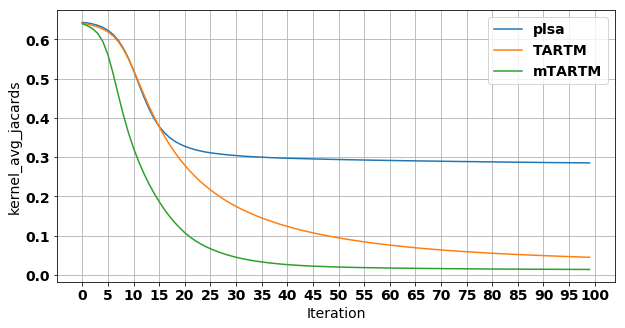

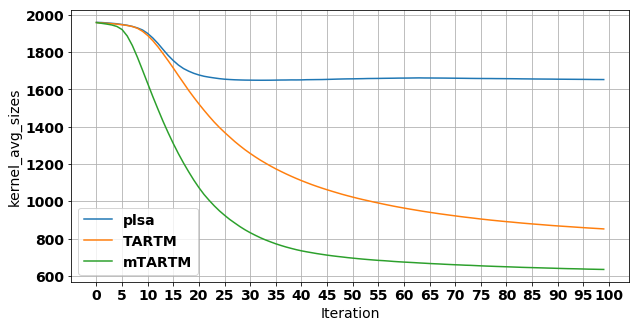

In [91]:
compare('avg_top10_pmis', lambda x: np.max(x, axis=0), 'NIPS_20t')
compare('avg_top20_pmis', lambda x: np.max(x, axis=0), 'NIPS_20t')
compare('test_perplexities', lambda x: np.min(x, axis=0), 'NIPS_20t')
compare('sparsities', lambda x: np.max(x, axis=0), 'NIPS_20t')
compare('kernel_avg_jacards', lambda x: np.min(x, axis=0), 'NIPS_20t')
compare('kernel_avg_sizes', lambda x: np.min(x, axis=0), 'NIPS_20t')